## Quantum Finance - Agentes de Investimento Baseados em Deep Reinforcement Learning

# Part 1 - Problema de negocio

### 1. Introdu√ß√£o e Problem√°tica

A automa√ß√£o da tomada de decis√£o em investimentos √© uma das √°reas mais inovadoras e desafiadoras do uso de intelig√™ncia artificial no mercado financeiro. Algoritmos de **Aprendizado por Refor√ßo Profundo (Deep Reinforcement Learning, DRL)** permitem a cria√ß√£o de agentes aut√¥nomos capazes de aprender estrat√©gias de negocia√ß√£o a partir de dados hist√≥ricos, simulando o comportamento de um operador profissional que busca maximizar o retorno ajustado ao risco ao longo do tempo.

Neste projeto, desenvolvemos e comparamos **dois rob√¥s de investimento baseados em redes neurais recorrentes** para operar no mercado de a√ß√µes brasileiro. Cada rob√¥ emprega uma arquitetura distinta, combinando camadas LSTM e GRU, otimizadas para capturar padr√µes temporais complexos dos pre√ßos dos ativos.

### 2. Diferencial do Projeto: Dois Rob√¥s de Trading com Deep RL

Para analisar o impacto do design da arquitetura neural no desempenho dos agentes, implementamos **dois agentes (rob√¥s) de DQN**:

#### **Rob√¥ 1: DQN LSTM-GRU Compacto**

* Arquitetura sequencial com camadas LSTM e GRU empilhadas
* Estrutura enxuta, focada em extrair padr√µes relevantes de curto e m√©dio prazo
* Indicado para cen√°rios com menor volume de dados e menor risco de overfitting

#### **Rob√¥ 2: DQN LSTM-GRU Profundo e Regularizado**

* Arquitetura mais profunda, com m√∫ltiplas camadas LSTM e GRU, al√©m de normaliza√ß√£o em batch e dropout para robustez
* Capaz de capturar din√¢micas de mercado mais complexas e evitar overfitting por meio de regulariza√ß√£o
* Ideal para s√©ries hist√≥ricas mais longas, maior variedade de ativos ou estrat√©gias sofisticadas

Ambos os agentes seguem o paradigma de **Q-Learning com fun√ß√£o de aproxima√ß√£o por rede neural**. Eles recebem, a cada etapa, o estado do mercado (pre√ßos normalizados, posi√ß√£o, contexto) e aprendem iterativamente as melhores decis√µes de comprar, vender ou manter cada ativo.

### 3. Motiva√ß√£o e Objetivo

* **Motiva√ß√£o**: Demonstrar como t√©cnicas de Deep RL podem automatizar e potencializar a gest√£o ativa de carteiras, reduzindo vi√©s humano e operando de maneira sistem√°tica, data-driven.
* **Objetivo**: Construir, treinar e comparar o desempenho de dois agentes inteligentes capazes de aprender estrat√©gias de trading nos ativos **VALE3.SA**, **PETR4.SA** e **BRFS3.SA**, maximizando o retorno e otimizando o risco ao longo do tempo.

> **Resumo**:

> Este estudo compara, na pr√°tica, duas arquiteturas de agente de trading baseadas em redes neurais profundas, destacando os impactos de diferentes escolhas de modelagem no resultado financeiro e operacional das estrat√©gias de RL aplicadas ao mercado de a√ß√µes brasileiro.

# Part 2 - Verifica√ß√£o GPU (Nvidia)

In [1]:
# Mostra informa√ß√µes da GPU dispon√≠vel (no Colab/Jupyter, use !nvidia-smi)
!nvidia-smi

Fri Jun 27 21:58:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.55.01              Driver Version: 576.40         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   63C    P8              9W /   80W |     372MiB /   4096MiB |     13%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Importa as principais bibliotecas de Deep Learning
import keras
import tensorflow as tf

# Exibe a vers√£o do TensorFlow e as GPUs detectadas pelo TensorFlow
print("Vers√£o do TensorFlow:", tf.__version__)
print("GPUs dispon√≠veis:", tf.config.list_physical_devices('GPU'))

# Verifica se o TensorFlow encontrou alguma GPU e exibe mensagem correspondente
if tf.config.list_physical_devices('GPU'):
    print("‚úÖ GPU encontrada e dispon√≠vel!")
else:
    print("‚ùå Nenhuma GPU encontrada. Usando apenas CPU.")

2025-06-27 21:58:14.747546: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-27 21:58:15.034957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751072295.144742     398 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751072295.177838     398 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751072295.414128     398 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Vers√£o do TensorFlow: 2.19.0
GPUs dispon√≠veis: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
‚úÖ GPU encontrada e dispon√≠vel!


In [4]:
# Verificar GPU dispon√≠vel com Keras
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7814623950083040553
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1853253223
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11117035671541562236
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


I0000 00:00:1751072307.857379     398 gpu_device.cc:2019] Created device /device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


# Part 3 - Importando bibliotecas

In [5]:
# Bibliotecas de an√°lise e manipula√ß√£o de dados
import pandas as pd
import numpy as np

# Machine Learning e Pr√©-processamento
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Deep Learning (TensorFlow e Keras)
import tensorflow as tf
from tensorflow import keras

# An√°lise t√©cnica (indicadores financeiros)
import ta

# Visualiza√ß√£o de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Utilit√°rios de programa√ß√£o e RL
from collections import deque
import random

In [6]:
# Base dados
df = pd.read_csv('dados_acoes_tratado_mineradoras2.csv')  # Troque para o caminho do seu CSV
df

Date       Open       High        Low      Close  \
0      2005-01-03 00:00:00-02:00  11.662088  11.814534  11.328232  11.410553   
1      2005-01-04 00:00:00-02:00  11.412079  11.433421  10.902910  10.945596   
2      2005-01-05 00:00:00-02:00  10.983707  11.041635  10.732171  10.869372   
3      2005-01-06 00:00:00-02:00  10.876993  10.930348  10.518746  10.823637   
4      2005-01-07 00:00:00-02:00  10.956266  11.280975  10.899861  11.113285   
...                          ...        ...        ...        ...        ...   
70363  2025-06-17 00:00:00-04:00  58.099998  58.160000  57.000000  57.009998   
70364  2025-06-18 00:00:00-04:00  57.150002  57.279999  56.869999  56.939999   
70365  2025-06-20 00:00:00-04:00  56.400002  56.509998  55.720001  55.889999   
70366  2025-06-23 00:00:00-04:00  55.669998  57.130001  55.639999  57.090000   
70367  2025-06-24 00:00:00-04:00  57.119999  57.470001  57.090000  57.189999   

        Volume    Ticker  
0      4057600  VALE3.SA  
1      4430400  VALE3.SA  
2      6939200  VALE3.SA  
3      3313600  VALE3.SA  
4      5248000  VALE3.SA  
...        ...       ...  
70363  2878000       RIO  
70364  2145000       RIO  
70365  4665700       RIO  
70366  3183600       RIO  
70367  3412300       RIO  

[70368 rows x 7 columns]

# Part 4 - Pr√©-processamento dos dados

In [6]:
# Converte a coluna 'Date' para o tipo datetime do pandas
df['Date'] = pd.to_datetime(df['Date'])


/tmp/ipykernel_689617/2394721818.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# Ordena o DataFrame por Ticker e Data (importante para s√©ries temporais)
df = df.sort_values(['Ticker', 'Date'])

In [8]:
# Define as colunas de features num√©ricas para normaliza√ß√£o
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# Cria e ajusta o MinMaxScaler usando os dados originais
scaler = MinMaxScaler()

# Normaliza as colunas num√©ricas no DataFrame
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# O objeto scaler pode ser usado depois para desnormalizar se necess√°rio
scaler

MinMaxScaler()

# Part 5 - Feature engineering

In [9]:
# Tenta criar o OneHotEncoder da forma mais moderna (p√≥s-scikit-learn 1.2); caso contr√°rio, usa o par√¢metro antigo
try:
    encoder = OneHotEncoder(sparse_output=False)  # scikit-learn >= 1.2
except TypeError:
    encoder = OneHotEncoder(sparse=False)         # scikit-learn < 1.2

# Ajusta o encoder e transforma os tickers em vari√°veis one-hot (matriz bin√°ria)
tickers_oh = encoder.fit_transform(df[['Ticker']])
tickers_names = encoder.categories_[0]

# Cria um DataFrame com as colunas one-hot, mantendo o mesmo √≠ndice do DataFrame original
df_onehot = pd.DataFrame(
    tickers_oh,
    columns=[f"Ticker_{t}" for t in tickers_names],
    index=df.index
)

# Concatena as novas colunas one-hot ao DataFrame original
df = pd.concat([df, df_onehot], axis=1)

# Exibe o DataFrame final com as colunas one-hot dos tickers
df

# Part 6 - Analise de dados

In [10]:
# Junte ao dataframe
df_onehot = pd.DataFrame(tickers_oh, columns=[f"Ticker_{t}" for t in tickers_names], index=df.index)
df_onehot

Ticker_BHP  Ticker_BRFS3.SA  Ticker_CMIN3.SA  Ticker_CSAN3.SA  \
60066         1.0              0.0              0.0              0.0   
60067         1.0              0.0              0.0              0.0   
60068         1.0              0.0              0.0              0.0   
60069         1.0              0.0              0.0              0.0   
60070         1.0              0.0              0.0              0.0   
...           ...              ...              ...              ...   
49759         0.0              0.0              0.0              0.0   
49760         0.0              0.0              0.0              0.0   
49761         0.0              0.0              0.0              0.0   
49762         0.0              0.0              0.0              0.0   
49763         0.0              0.0              0.0              0.0   

       Ticker_CVX  Ticker_EGIE3.SA  Ticker_ELET3.SA  Ticker_GGBR4.SA  \
60066         0.0              0.0              0.0              0.0   
60067         0.0              0.0              0.0              0.0   
60068         0.0              0.0              0.0              0.0   
60069         0.0              0.0              0.0              0.0   
60070         0.0              0.0              0.0              0.0   
...           ...              ...              ...              ...   
49759         0.0              0.0              0.0              0.0   
49760         0.0              0.0              0.0              0.0   
49761         0.0              0.0              0.0              0.0   
49762         0.0              0.0              0.0              0.0   
49763         0.0              0.0              0.0              0.0   

       Ticker_PETR4.SA  Ticker_PRIO3.SA  Ticker_RIO  Ticker_SHEL  \
60066              0.0              0.0         0.0          0.0   
60067              0.0              0.0         0.0          0.0   
60068              0.0              0.0         0.0          0.0   
60069              0.0              0.0         0.0          0.0   
60070              0.0              0.0         0.0          0.0   
...                ...              ...         ...          ...   
49759              0.0              0.0         0.0          0.0   
49760              0.0              0.0         0.0          0.0   
49761              0.0              0.0         0.0          0.0   
49762              0.0              0.0         0.0          0.0   
49763              0.0              0.0         0.0          0.0   

       Ticker_SLCE3.SA  Ticker_VALE3.SA  Ticker_XOM  
60066              0.0              0.0         0.0  
60067              0.0              0.0         0.0  
60068              0.0              0.0         0.0  
60069              0.0              0.0         0.0  
60070              0.0              0.0         0.0  
...                ...              ...         ...  
49759              0.0              0.0         1.0  
49760              0.0              0.0         1.0  
49761              0.0              0.0         1.0  
49762              0.0              0.0         1.0  
49763              0.0              0.0         1.0  

[70368 rows x 15 columns]

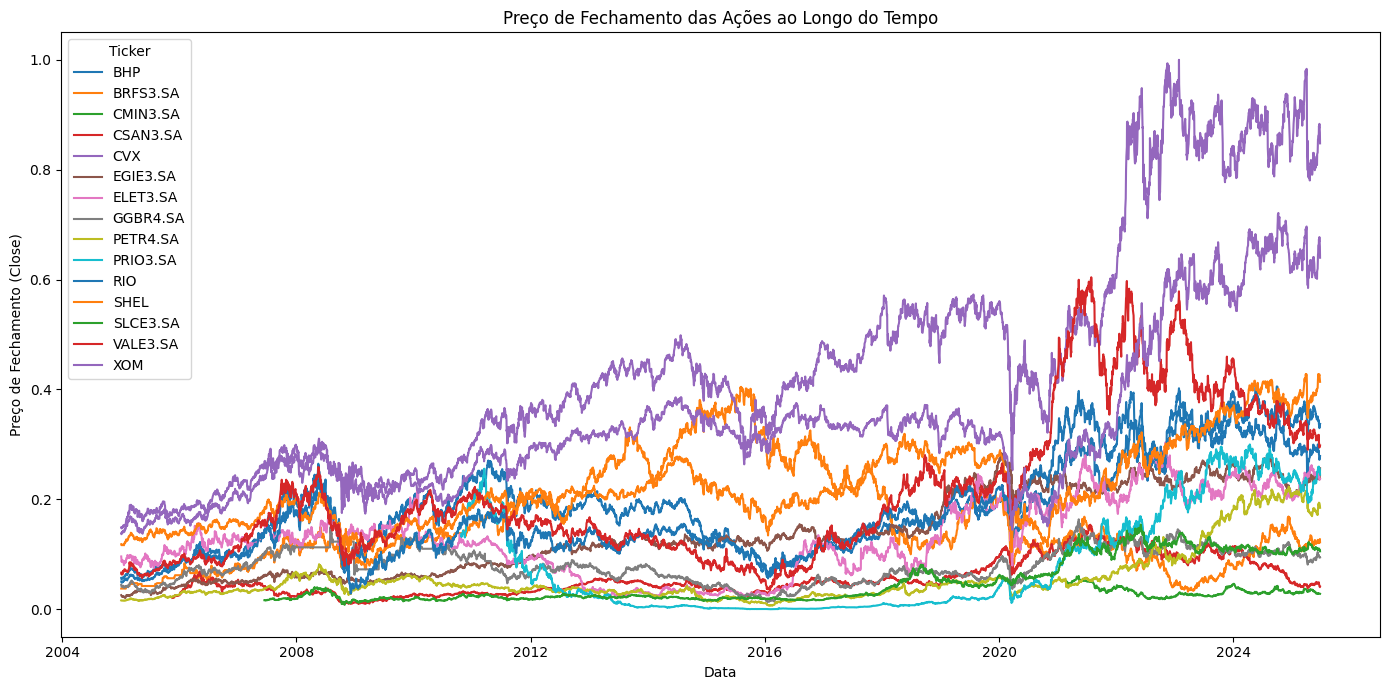

In [11]:
# Seleciona todos os tickers √∫nicos do DataFrame
tickers = df['Ticker'].unique()  # Defina os tickers aqui!

plt.figure(figsize=(14, 7))

# Para cada ticker, plota a curva de fechamento ao longo do tempo
for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    plt.plot(df_ticker['Date'], df_ticker['Close'], label=ticker)

# Ajusta t√≠tulo e r√≥tulos dos eixos
plt.title('Pre√ßo de Fechamento das A√ß√µes ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Pre√ßo de Fechamento (Close)')

# Coloca legenda e embeleza o gr√°fico
plt.legend(title='Ticker')
plt.grid(True, linestyle='--', alpha=0.5)  # Grid leve melhora leitura temporal
plt.tight_layout()
plt.show()

**An√°lise**

O gr√°fico mostra a evolu√ß√£o do pre√ßo de fechamento (normalizado) de v√°rias a√ß√µes de empresas brasileiras e estrangeiras, com destaque para mineradoras, petroleiras e outros setores estrat√©gicos. O eixo **x** representa o tempo (de 2004 at√© 2025) e o eixo **y** traz os valores dos pre√ßos de fechamento j√° normalizados (por MinMaxScaler, entre 0 e 1).

**Principais Pontos Observados**

1. **Diverg√™ncia de Performance entre Ativos**

   * Algumas empresas apresentam tend√™ncias de alta de longo prazo, enquanto outras oscilam lateralmente ou at√© apresentam quedas. Isso mostra como o setor, estrat√©gia empresarial e o contexto econ√¥mico global impactam o pre√ßo das a√ß√µes de cada companhia.

2. **Mineradoras de Destaque**

   * **BHP, RIO, VALE3.SA**: Tradicionalmente, mineradoras acompanham o ciclo das commodities. O gr√°fico mostra momentos de forte valoriza√ß√£o e per√≠odos de lateraliza√ß√£o, refletindo o boom das commodities, crises e recupera√ß√µes.
   * **VALE3.SA** mostra picos (ex: recupera√ß√£o ap√≥s 2015/2016), mas tamb√©m quedas abruptas que podem estar relacionadas a eventos setoriais, desastres ou retra√ß√£o econ√¥mica.

3. **Empresas de Petr√≥leo e Energia**

   * **PETR4.SA, XOM, SHEL, PRIO3.SA, CVX**: Empresas de petr√≥leo sofrem influ√™ncia do pre√ßo internacional do barril, crises pol√≠ticas e movimentos do d√≥lar. Notam-se oscila√ß√µes abruptas (2020, por exemplo, com o choque de pre√ßos devido √† pandemia).

4. **Volatilidade e Crises**

   * Momentos de alta volatilidade, como 2008 (crise financeira global), 2015/2016 (crise das commodities e pol√≠tica brasileira) e 2020 (COVID-19) aparecem como ‚Äúquedas‚Äù ou oscila√ß√µes bruscas em quase todos os ativos.
   * **PRIO3.SA** e **SLCE3.SA** (agro, energia renov√°vel) mostram padr√µes diferenciados, podendo refletir menor correla√ß√£o com crises espec√≠ficas de minera√ß√£o e petr√≥leo.

5. **Empresas Brasileiras vs. Estrangeiras**

   * A√ß√µes como **BHP, XOM, SHEL, RIO** parecem ter tido melhor desempenho relativo no longo prazo, sugerindo resili√™ncia global, enquanto algumas brasileiras enfrentaram maiores dificuldades e oscila√ß√µes.

6. **Tend√™ncia de Recupera√ß√£o P√≥s-Crise**

   * Em v√°rios ativos, especialmente de 2020 em diante, observa-se forte recupera√ß√£o. O movimento p√≥s-pandemia pode ter sido alavancado por est√≠mulos globais e aumento da demanda por commodities.

**Insights e Poss√≠veis Decis√µes**

* **Diversifica√ß√£o √© fundamental:** O gr√°fico demonstra que diferentes setores e geografias reagem de formas distintas a eventos globais e locais.
  
* **Timing e eventos externos:** O investidor que opera apenas buy & hold em commodities est√° exposto a grandes oscila√ß√µes. Estrat√©gias sistem√°ticas, como agentes de RL, podem capturar movimentos de alta e proteger contra quedas abruptas.

  
* **Aten√ß√£o ao contexto macro:** Oscila√ß√µes em empresas de commodities costumam antecipar ou refletir ciclos econ√¥micos globais.

**Recomenda√ß√µes para Pr√≥ximas An√°lises**

* Plotar o **lucro acumulado** do agente RL versus o buy & hold por ativo.
* Adicionar m√©tricas como **volatilidade hist√≥rica**, **drawdown** e **sharpe ratio** por ticker.
* Analisar **correla√ß√£o** entre ativos para explorar sinergias e estrat√©gias de hedge.

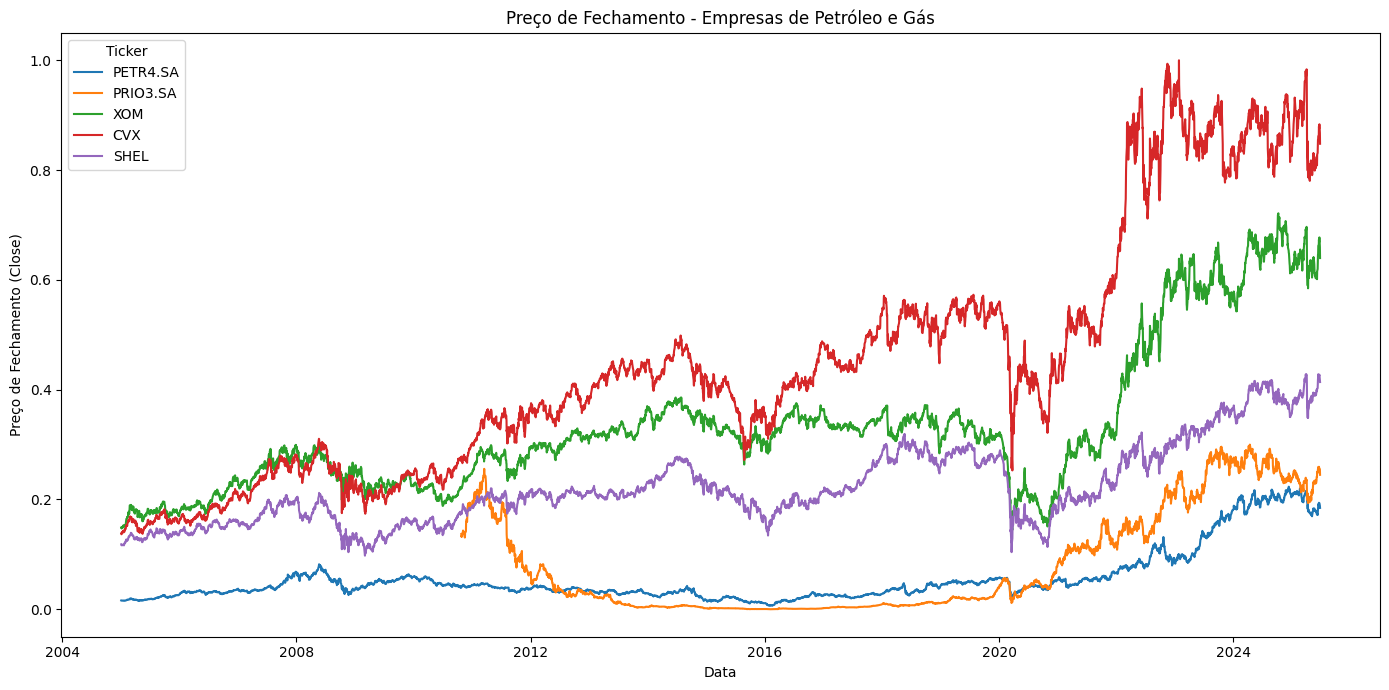

In [12]:
# Obt√©m a lista de tickers √∫nicos do DataFrame
tickers = df['Ticker'].unique()

# Define o tamanho da figura do gr√°fico
plt.figure(figsize=(14, 7))

# Plota a curva de pre√ßo de fechamento para cada ticker
for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    plt.plot(df_ticker['Date'], df_ticker['Close'], label=ticker)

# Configura√ß√µes finais do gr√°fico
plt.title('Pre√ßo de Fechamento das A√ß√µes ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Pre√ßo de Fechamento (Close)')
plt.legend(title='Ticker')
plt.grid(False)         # Remove o grid de fundo
plt.tight_layout()      # Ajusta layout para evitar cortes
plt.show()

**An√°lise**

O gr√°fico compara o comportamento dos pre√ßos das a√ß√µes de cinco grandes empresas do setor de petr√≥leo e g√°s (**PETR4.SA**, **PRIO3.SA**, **XOM**, **CVX** e **SHEL**) ao longo dos anos, de 2004 at√© 2025.

* **Cada linha** representa uma empresa diferente.
* O eixo **X** mostra o tempo (anos).
* O eixo **Y** mostra o pre√ßo das a√ß√µes (em escala normalizada para facilitar a compara√ß√£o).

**O que d√° para perceber olhando para o gr√°fico?**

1. **Subidas e Descidas dos Pre√ßos**

   * Todas as empresas passaram por momentos de alta (valoriza√ß√£o das a√ß√µes) e baixa (quedas nos pre√ßos). Isso √© normal nesse setor, pois ele depende muito do pre√ßo do petr√≥leo, que muda bastante ao longo do tempo.

2. **Crises e Recupera√ß√µes**

   * D√° para ver quedas bruscas em alguns momentos (por exemplo, por volta de 2020), que coincidem com crises mundiais como a pandemia do COVID-19, onde o consumo de petr√≥leo caiu muito.
   * Ap√≥s essas crises, algumas empresas conseguiram se recuperar e at√© superar o pre√ßo anterior.

3. **Diferen√ßa entre Empresas**

   * Empresas estrangeiras como **CVX** (Chevron) e **XOM** (ExxonMobil) mostram uma recupera√ß√£o mais forte e consistente ao longo do tempo, principalmente a partir de 2021.
   * **PETR4.SA** (Petrobras) tem desempenho mais ‚Äút√≠mido‚Äù, ou seja, cresce menos e √© mais afetada por crises.
   * **SHEL** e **PRIO3.SA** (empresas com foco em g√°s e petr√≥leo ‚Äúoffshore‚Äù) t√™m um crescimento intermedi√°rio.

4. **Tend√™ncia de Longo Prazo**

   * Apesar das oscila√ß√µes, a maioria das empresas conseguiu crescer ao longo do tempo, mostrando que quem investiu e esperou alguns anos teve ganhos, especialmente nas empresas americanas.


**Resumo Pr√°tico:**

* **Investir em petr√≥leo √© montanha-russa:** O pre√ßo sobe e desce bastante, mas a tend√™ncia de longo prazo pode ser positiva para as grandes empresas globais.
  
* **Crises afetam todo mundo, mas nem todas as empresas reagem igual:** Empresas americanas parecem se recuperar melhor que a brasileira Petrobras.

* **Olhando no tempo certo, todo investidor passa por altos e baixos, mas paci√™ncia pode trazer bons resultados.**


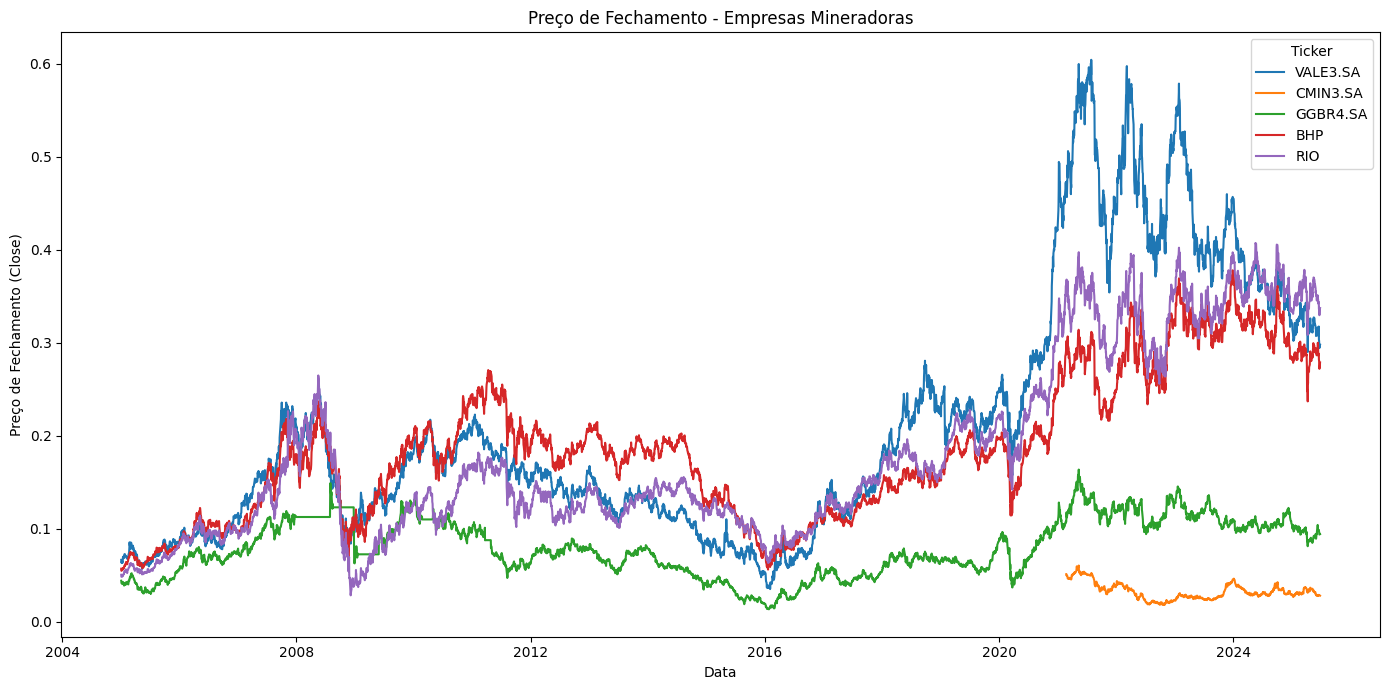

In [13]:
# Lista de tickers das empresas mineradoras de interesse
tickers_mineradoras = ["VALE3.SA", "CMIN3.SA", "GGBR4.SA", "BHP", "RIO"]

plt.figure(figsize=(14, 7))

# Plota o pre√ßo de fechamento ao longo do tempo para cada mineradora presente no DataFrame
for ticker in tickers_mineradoras:
    if ticker in df['Ticker'].values:
        df_ticker = df[df['Ticker'] == ticker]
        plt.plot(df_ticker['Date'], df_ticker['Close'], label=ticker)

# T√≠tulos e legendas
plt.title('Pre√ßo de Fechamento - Empresas Mineradoras')
plt.xlabel('Data')
plt.ylabel('Pre√ßo de Fechamento (Close)')
plt.legend(title='Ticker')
plt.grid(False)         # Sem grid, para visual mais limpo
plt.tight_layout()
plt.show()

**An√°lise**
  
O gr√°fico acompanha o pre√ßo das a√ß√µes das principais mineradoras do Brasil e do mundo ao longo do tempo (2004 a 2025).

* **Cada linha**: uma mineradora diferente.
* **Eixo X**: anos.
* **Eixo Y**: pre√ßo da a√ß√£o (normalizado).

**Principais Observa√ß√µes do Gr√°fico:**

1. **Oscila√ß√µes intensas**

   * Todas as mineradoras passam por per√≠odos de alta e baixa, mas a volatilidade (os "sobe e desce") √© bem vis√≠vel, principalmente em momentos de crise mundial ou boom das commodities.

2. **VALE3.SA lidera a volatilidade**

   * A a√ß√£o da **Vale** tem picos de alta muito expressivos, especialmente entre 2020 e 2022, indicando per√≠odos em que o pre√ßo do min√©rio de ferro disparou (influ√™ncia de China, pandemia, demanda mundial).
   * Depois dos picos, a VALE tamb√©m mostra quedas r√°pidas, refletindo a sensibilidade do setor a not√≠cias e mudan√ßas globais.

3. **BHP e RIO (australianas/inglesas) s√£o mais est√°veis**

   * Essas empresas apresentam crescimento mais consistente, com menos varia√ß√µes abruptas, mostrando resili√™ncia global e atua√ß√£o diversificada.

4. **GGBR4.SA (Gerdau) e CMIN3.SA (CSN Minera√ß√£o)**

   * Apresentam crescimento, mas com menor intensidade e menos volatilidade que a VALE.
   * A CSN Minera√ß√£o (CMIN3.SA) tem trajet√≥ria mais ‚Äúlinear‚Äù, sugerindo menor risco ‚Äî mas tamb√©m menores picos de valoriza√ß√£o.

5. **Impactos Globais**

   * Quedas bruscas em 2008 e 2015 refletem crises financeiras e de commodities, afetando todo o setor.
   * A recupera√ß√£o ap√≥s 2020 indica retomada da demanda por metais e forte valoriza√ß√£o das mineradoras.

**Resumo para leigos:**

* **A√ß√µes de mineradoras s√£o sens√≠veis ao mercado mundial**: not√≠cias sobre China, EUA e commodities afetam fortemente os pre√ßos.
* **Vale √© a mais ‚Äúemocionante‚Äù**: potencial de grandes lucros, mas tamb√©m riscos altos.
* **Empresas globais (BHP, RIO) s√£o mais est√°veis**, ideais para quem prefere menos sustos.
* **Boas oportunidades aparecem ap√≥s quedas grandes**, mas √© preciso ter paci√™ncia (e nervos de a√ßo!).

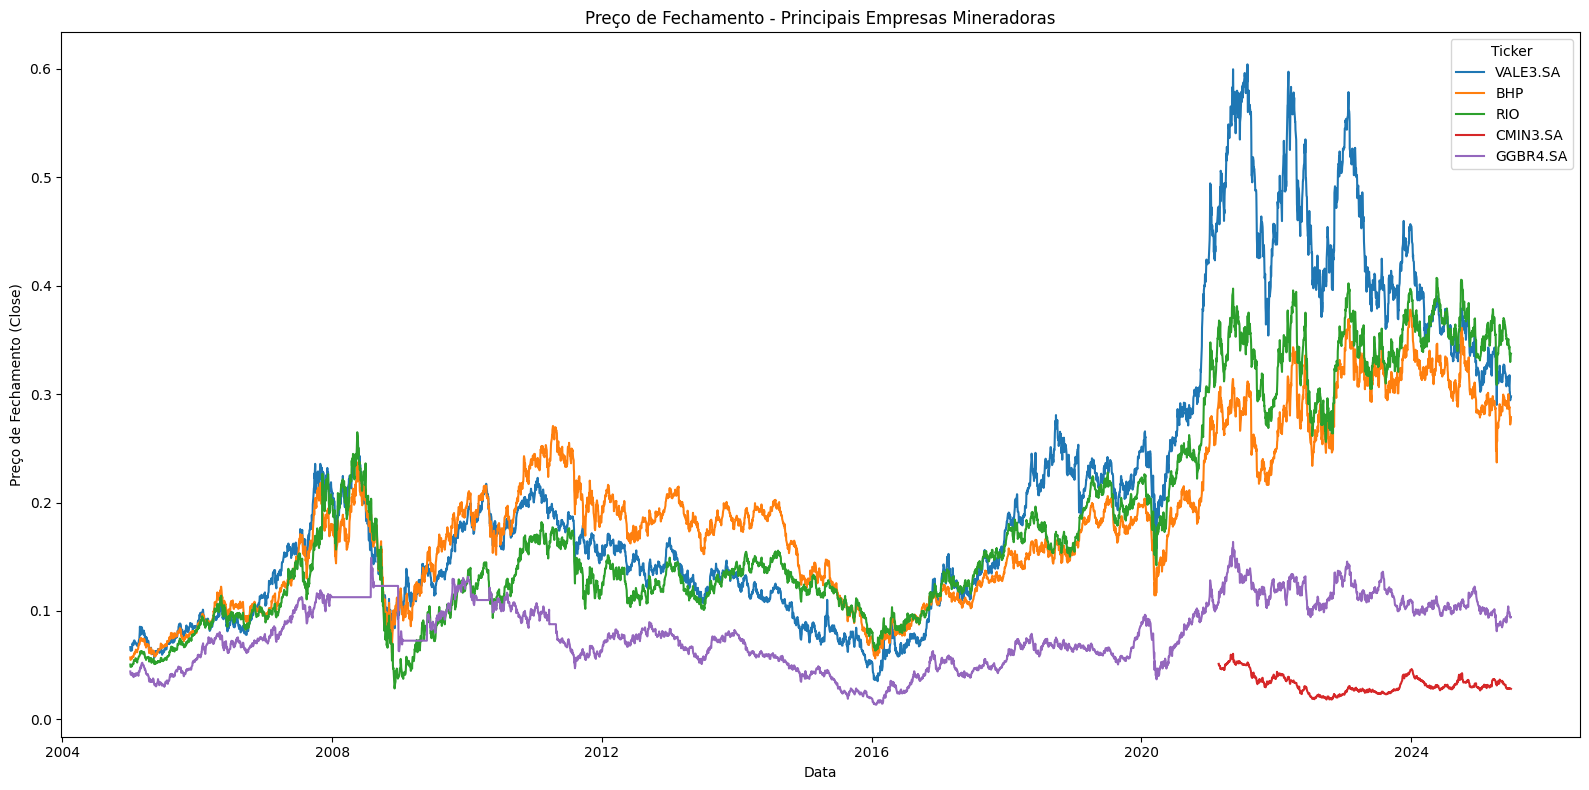

In [14]:
# Lista das principais mineradoras globais e brasileiras
tickers_mineradoras_top = [
    "VALE3.SA",    # Vale
    "BHP",         # BHP Group
    "RIO",         # Rio Tinto
    "GLNCY",       # Glencore
    "FCX",         # Freeport-McMoRan
    "ANGPY",       # Anglo American
    "CMIN3.SA",    # CSN Minera√ß√£o
    "GGBR4.SA",    # Gerdau
    "CSNA3.SA"     # CSN
]

plt.figure(figsize=(16, 8))

# Plota o pre√ßo de fechamento ao longo do tempo para cada mineradora dispon√≠vel no DataFrame
for ticker in tickers_mineradoras_top:
    if ticker in df['Ticker'].values:
        df_ticker = df[df['Ticker'] == ticker]
        plt.plot(df_ticker['Date'], df_ticker['Close'], label=ticker)

# T√≠tulos, legendas e ajustes visuais
plt.title('Pre√ßo de Fechamento - Principais Empresas Mineradoras')
plt.xlabel('Data')
plt.ylabel('Pre√ßo de Fechamento (Close)')
plt.legend(title='Ticker')
plt.grid(False)
plt.tight_layout()
plt.show()

**An√°lise**

**Principais Insights do Gr√°fico:**

1. **VALE3.SA (Vale) se destaca**

   * A Vale apresenta fortes oscila√ß√µes e os maiores picos de valoriza√ß√£o, principalmente ap√≥s 2020.
   * Isso reflete grandes oportunidades, mas tamb√©m grandes riscos para quem investe nela.

2. **BHP e RIO (mineradoras globais)**

   * Mostram crescimento constante e consistente ao longo dos anos.
   * S√£o menos vol√°teis que a Vale, mostrando resili√™ncia e estabilidade no mercado global.

3. **CMIN3.SA e GGBR4.SA (empresas brasileiras)**

   * T√™m pre√ßos bem mais baixos e oscila√ß√µes mais suaves.
   * Apresentam crescimento, mas em um patamar menor, o que pode indicar menor exposi√ß√£o a grandes oscila√ß√µes de mercado ou menor influ√™ncia internacional.

4. **Impactos Globais e Crises**

   * Todos os ativos mostram quedas pr√≥ximas a 2008 (crise financeira global) e recupera√ß√£o nos anos seguintes.
   * Ap√≥s 2020, h√° um movimento de forte valoriza√ß√£o nas principais mineradoras, muito provavelmente pela alta da demanda mundial por min√©rio.

**Resumo para N√£o T√©cnicos**

* **Mineradoras podem ser investimentos lucrativos, mas vol√°teis** ‚Äî especialmente VALE3.SA, que tem altos e baixos acentuados.
* **BHP e RIO s√£o op√ß√µes mais ‚Äútranquilas‚Äù**, com crescimento constante e menos sustos no caminho.
* **Empresas menores (CMIN3.SA, GGBR4.SA) t√™m crescimento mais discreto, mas tamb√©m menos risco**.
* **Grandes crises e movimentos globais afetam TODAS as mineradoras**, mas cada uma reage de um jeito, dependendo do tamanho, da diversifica√ß√£o e da posi√ß√£o no mercado mundial.

# Part 7 - Fun√ß√£o para construir o estado

- Fun√ß√£o de estado para o agente

In [15]:
# fun√ß√£o de estado: pre√ßos + ticker one-hot + posi√ß√£o atual
def get_state(row, posicao):
    features = row[feature_cols].tolist()
    ticker_features = row[[col for col in df.columns if col.startswith('Ticker_')]].tolist()
    return np.array(features + ticker_features + [posicao], dtype=np.float32)

# Part 8 - Par√¢metros Agente RNN

In [16]:
# Para exemplo, use s√≥ um ticker (ex: VALE3.SA)
ticker_escolhido = df['Ticker'].unique()[0]
df_ticker = df[df['Ticker'] == ticker_escolhido].sort_values('Date').reset_index(drop=True)

# Guarde pre√ßos reais (opcional)
df_ticker['Close_real'] = df_ticker['Close']

In [17]:
# Define as colunas num√©ricas (features) que ser√£o utilizadas como entrada para o modelo
FEATURE_COLS = ['Open', 'High', 'Low', 'Close', 'Volume']

In [18]:
# Normalizar (opcional, mas recomendado)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_ticker[FEATURE_COLS] = scaler.fit_transform(df_ticker[FEATURE_COLS])

In [19]:
# Fun√ß√£o para construir sequ√™ncias de estados e pr√≥ximos estados para modelos sequenciais (LSTM/GRU)
def build_sequences(df, seq_len, feature_cols):
    states, next_states, dates = [], [], []
    for i in range(seq_len, len(df)):
        # Estado atual: janela dos √∫ltimos 'seq_len' dias
        state = df.iloc[i-seq_len:i][feature_cols].values  # shape: (SEQ_LEN, num_features)
        # Pr√≥ximo estado: janela deslocada em +1
        next_state = df.iloc[i-seq_len+1:i+1][feature_cols].values
        states.append(state)
        next_states.append(next_state)
        dates.append(df.iloc[i]['Date'])  # Data referente ao pr√≥ximo estado
    return np.array(states), np.array(next_states), dates

# Define o tamanho da janela para as sequ√™ncias (quantos dias/steps olhar para tr√°s)
SEQ_LEN = 10

# Gera os arrays de estados e pr√≥ximos estados para o modelo
states, next_states, dates = build_sequences(df_ticker, SEQ_LEN, FEATURE_COLS)
print("states shape:", states.shape)  # Deve ser (N, SEQ_LEN, num_features)

states shape: (5141, 10, 5)


# Part 10 - Agente 1

In [20]:
# Garante que as features num√©ricas est√£o definidas para a cria√ß√£o das sequ√™ncias
FEATURE_COLS = ['Open', 'High', 'Low', 'Close', 'Volume']  # (defina aqui caso ainda n√£o tenha feito)

# Usa a fun√ß√£o build_sequences para criar os arrays de estados e pr√≥ximos estados para o modelo sequencial
states, next_states, dates = build_sequences(df_ticker, seq_len=SEQ_LEN, feature_cols=FEATURE_COLS)

In [21]:
# Defini√ß√£o do Agente RL (DQN LSTM+GRU)
class DQNAgent_LSTM_GRU:
    def __init__(self, state_shape, action_size, lr=1e-3):
        # Inicializa par√¢metros principais do agente
        self.state_shape = state_shape
        self.action_size = action_size
        self.memory = deque(maxlen=3000)     # Mem√≥ria de experi√™ncias
        self.gamma = 0.95                    # Fator de desconto (quanto valoriza recompensas futuras)
        self.epsilon = 1.0                   # Probabilidade inicial de explora√ß√£o (explore vs exploit)
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995           # Decaimento da explora√ß√£o ao longo do tempo
        self.batch_size = BATCH_SIZE
        self.model = self._build_model(lr)   # Cria o modelo de rede neural
        self.model.summary()                 # Mostra a arquitetura da rede ao instanciar o agente

    # Monta a arquitetura da rede neural sequencial (LSTM + GRU + densas)
    def _build_model(self, lr):
        model = keras.Sequential([
            keras.layers.LSTM(128, return_sequences=True, input_shape=self.state_shape),
            keras.layers.LSTM(64, return_sequences=True),
            keras.layers.GRU(64, return_sequences=True),
            keras.layers.GRU(32),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mse')
        return model

    # Salva experi√™ncia na mem√≥ria do agente
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    # Pol√≠tica de decis√£o do agente (Œµ-greedy)
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            # Explora√ß√£o (a√ß√£o aleat√≥ria)
            return random.randrange(self.action_size)
        # Exploitation (escolha da melhor a√ß√£o segundo a rede neural)
        q_values = self.model.predict(state[np.newaxis], verbose=0)
        return np.argmax(q_values[0])

    # Replay: treina a rede neural com amostras da mem√≥ria
    def replay(self):
        if len(self.memory) < self.batch_size:
            return 0.0
        minibatch = random.sample(self.memory, self.batch_size)
        states_mb, targets_mb = [], []
        for state, action, reward, next_state, done in minibatch:
            assert len(state.shape) == 2, f"State shape errado: {state.shape}"
            target = self.model.predict(state[np.newaxis], verbose=0)[0]
            if done:
                target[action] = reward
            else:
                t_next = self.model.predict(next_state[np.newaxis], verbose=0)[0]
                target[action] = reward + self.gamma * np.amax(t_next)
            states_mb.append(state)
            targets_mb.append(target)
        states_mb = np.array(states_mb)
        targets_mb = np.array(targets_mb)
        history = self.model.fit(states_mb, targets_mb, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return history.history['loss'][0]

# Par√¢metros do problema
FEATURE_COLS = ['Open', 'High', 'Low', 'Close', 'Volume']
SEQ_LEN = 10
NUM_ACTIONS = 3
EPOCHS = 100
BATCH_SIZE = 32
CAPITAL_INICIAL = 10_000  # Capital inicial em reais
TAMANHO_LOTE = 1          # Lote de a√ß√µes por trade (ajust√°vel)

# Instancia o agente com a arquitetura definida
agent = DQNAgent_LSTM_GRU(state_shape=(SEQ_LEN, len(FEATURE_COLS)), action_size=NUM_ACTIONS)

# (Opcional) Visualiza novamente o summary do modelo
agent.model.summary()

I0000 00:00:1751050190.352404  689617 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/tensor_linux/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm (LSTM)                     ‚îÇ (None, 10, 128)        ‚îÇ        68,608 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_1 (LSTM)                   ‚îÇ (None, 10, 64)         ‚îÇ        49,408 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ gru (GRU)                       ‚îÇ (None, 10, 64)         ‚îÇ        24,960 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ gru_1 (GRU)                     ‚îÇ (None, 32)             ‚îÇ         9,408 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ         4,224 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 3)              ‚îÇ            99 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 167,043 (652.51 KB)

 Trainable params: 167,043 (652.51 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm (LSTM)                     ‚îÇ (None, 10, 128)        ‚îÇ        68,608 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_1 (LSTM)                   ‚îÇ (None, 10, 64)         ‚îÇ        49,408 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ gru (GRU)                       ‚îÇ (None, 10, 64)         ‚îÇ        24,960 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ gru_1 (GRU)                     ‚îÇ (None, 32)             ‚îÇ         9,408 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ         4,224 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 3)              ‚îÇ            99 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 167,043 (652.51 KB)

 Trainable params: 167,043 (652.51 KB)

 Non-trainable params: 0 (0.00 B)

**1. O que √© um Agente DQN?**

* **DQN** significa *Deep Q-Network*: √© um agente de aprendizado por refor√ßo que aprende a tomar decis√µes analisando sequ√™ncias de estados, recompensas e a√ß√µes.
* O objetivo do agente: **aprender, sozinho, a comprar, vender ou manter a√ß√µes para maximizar o lucro**, analisando sequ√™ncias hist√≥ricas de pre√ßos.

**2. Como o agente toma decis√µes?**

O agente funciona em 3 etapas principais:

1. **Observa o estado do mercado**

   * O estado √© uma janela com os √∫ltimos 10 dias (`SEQ_LEN = 10`) de informa√ß√µes como pre√ßo de abertura, fechamento, m√°xima, m√≠nima e volume.
   * Esses dados s√£o organizados como uma matriz (10 dias √ó 5 colunas = 10√ó5).

2. **Decide a a√ß√£o a tomar**

   * O agente pode **comprar, vender ou manter** (3 a√ß√µes poss√≠veis).
   * Inicialmente, ele testa a√ß√µes aleat√≥rias (explora√ß√£o) para aprender.
   * Conforme aprende, passa a escolher cada vez mais as melhores a√ß√µes previstas pela rede neural (explora√ß√£o ‚Üí explora√ß√£o).

3. **Aprende a partir das experi√™ncias**

   * A cada opera√ß√£o, ele registra o que fez (estado, a√ß√£o, recompensa, novo estado, se terminou).
   * Regularmente, ele ‚Äúrelembra‚Äù experi√™ncias passadas e treina sua rede neural para melhorar suas decis√µes futuras.

**3. Como √© a Rede Neural utilizada?**

**Arquitetura**

A rede neural usada pelo agente √© **profunda e h√≠brida**:
Combina camadas LSTM, GRU e densas (Dense).

**Por que isso?**

* **LSTM (Long Short-Term Memory)** e **GRU (Gated Recurrent Unit)** s√£o tipos de redes neurais recorrentes *especializadas em processar sequ√™ncias*, capturando padr√µes temporais dos pre√ßos das a√ß√µes.
* As **camadas densas (Dense)** servem para ‚Äúmisturar‚Äù e processar as informa√ß√µes extra√≠das pelas LSTMs e GRUs, produzindo finalmente a previs√£o de qual a√ß√£o tomar.

**Detalhamento da arquitetura**

```python
keras.layers.LSTM(128, return_sequences=True, input_shape=self.state_shape),
keras.layers.LSTM(64, return_sequences=True),
keras.layers.GRU(64, return_sequences=True),
keras.layers.GRU(32),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(32, activation='relu'),
keras.layers.Dense(self.action_size, activation='linear')
```
* **2 camadas LSTM** (128 e 64 neur√¥nios): processam a sequ√™ncia dos √∫ltimos 10 dias.
* **2 camadas GRU** (64 e 32 neur√¥nios): refinam ainda mais os padr√µes temporais.
* **V√°rias camadas densas**: permitem √† rede criar combina√ß√µes n√£o-lineares das informa√ß√µes.
* **Dropout**: ajuda a evitar ‚Äúoverfitting‚Äù (memoriza√ß√£o dos dados).
* **Sa√≠da**: 3 valores (um para cada a√ß√£o: manter, comprar, vender) ‚Äî o maior valor indica a melhor a√ß√£o prevista.

**4. Como a Rede aprende?**

* **Mem√≥ria de experi√™ncias (Replay Memory):** O agente guarda situa√ß√µes passadas (como se fosse um di√°rio) e treina a rede neural usando exemplos sorteados aleatoriamente dessa mem√≥ria.
* **Treinamento cont√≠nuo:** A cada rodada, ele melhora um pouco a previs√£o da rede.
* **Decaimento do Œµ (epsilon):** Com o tempo, o agente vai arriscando menos e confiando mais nas previs√µes da rede (menos explora√ß√£o, mais explora√ß√£o).

**5. Resumo Visual**

```
(√∫ltimos 10 dias de dados)
    ‚îÇ
    ‚ñº
[LSTM] ‚Üí [LSTM] ‚Üí [GRU] ‚Üí [GRU] ‚Üí [Densas]
    ‚îÇ
    ‚ñº
[3 valores: manter, comprar, vender]   ‚Üê decis√£o final do agente
```

**Por que usar LSTM e GRU em finan√ßas?**

Porque movimentos de pre√ßos **dependem fortemente do hist√≥rico**, e essas redes s√£o mestres em captar padr√µes temporais e de repeti√ß√£o, fundamentais para encontrar oportunidades e evitar riscos.

# Part 11 - Treinamento do agente RL

In [22]:
# Treinamento do agente RL

# ============================
# Treinamento do agente RL
# ============================

historico = []           # Lista para armazenar o hist√≥rico detalhado das opera√ß√µes
lucros_por_epoca = []    # Saldo final ao final de cada √©poca de treinamento
losses = []              # Perdas (loss do modelo) em cada √©poca

for epoca in range(EPOCHS):
    posicao = 0                 # 0 = fora do ativo, 1 = comprado
    preco_compra_real = 0       # Pre√ßo real da compra atual
    saldo = CAPITAL_INICIAL     # Saldo inicial (R$) para a √©poca
    lucro_real = 0              # Lucro da opera√ß√£o (usado para logging)

    for i in range(len(states)):
        state = states[i]                          # Estado atual
        action = agent.act(state)                  # A√ß√£o escolhida pelo agente
        reward = 0                                 # Inicializa reward

        # Obt√©m o pre√ßo real do fechamento para o dia atual
        close_real = df_ticker.iloc[i+SEQ_LEN-1]['Close_real']

        # L√≥gica das opera√ß√µes
        if action == 1 and posicao == 0:  # COMPRAR
            posicao = 1
            preco_compra_real = close_real

        elif action == 2 and posicao == 1:  # VENDER
            preco_venda_real = close_real
            reward = preco_venda_real - preco_compra_real  # Lucro/preju√≠zo da opera√ß√£o
            lucro_real = reward
            saldo += reward
            posicao = 0
            preco_compra_real = 0

        elif action == 2 and posicao == 0:
            reward = -1  # Penalidade por tentar vender sem estar comprado

        # Prepara pr√≥ximo estado
        next_state = next_states[i]
        done = (i == len(states) - 1)

        # Armazena experi√™ncia na mem√≥ria
        agent.remember(state, action, reward, next_state, done)

        # Salva hist√≥rico detalhado
        historico.append({
            '√âpoca': epoca+1,
            'Data': dates[i],
            'Ticker': ticker_escolhido,
            'A√ß√£o': ["MANTER", "COMPRAR", "VENDER"][action],
            'Reward': reward,
            'Saldo': saldo,
            'Close_real': close_real,
            'Lucro_real': lucro_real if action == 2 else 0
        })

    # Treina o modelo (replay) ao final de cada √©poca
    loss = agent.replay()
    losses.append(loss)
    lucros_por_epoca.append(saldo)
    print(f"√âpoca {epoca+1}: saldo final = {saldo:.2f}, loss = {loss:.4f}")

I0000 00:00:1751050191.640955  689713 cuda_dnn.cc:529] Loaded cuDNN version 90501


√âpoca 1: saldo final = 10000.24, loss = 0.0509
√âpoca 2: saldo final = 10000.10, loss = 0.0540
√âpoca 3: saldo final = 10000.15, loss = 0.0569
√âpoca 4: saldo final = 9999.96, loss = 0.0305
√âpoca 5: saldo final = 10000.12, loss = 0.0302
√âpoca 6: saldo final = 10000.03, loss = 0.0308
√âpoca 7: saldo final = 10000.08, loss = 0.0209
√âpoca 8: saldo final = 10000.15, loss = 0.0292
√âpoca 9: saldo final = 10000.37, loss = 0.0501
√âpoca 10: saldo final = 9999.94, loss = 0.0442
√âpoca 11: saldo final = 10000.17, loss = 0.0311
√âpoca 12: saldo final = 9999.90, loss = 0.0384
√âpoca 13: saldo final = 9999.87, loss = 0.0200
√âpoca 14: saldo final = 10000.32, loss = 0.0331
√âpoca 15: saldo final = 10000.13, loss = 0.0231
√âpoca 16: saldo final = 10000.01, loss = 0.0368
√âpoca 17: saldo final = 10000.21, loss = 0.0225
√âpoca 18: saldo final = 9999.78, loss = 0.0355
√âpoca 19: saldo final = 10000.05, loss = 0.0250
√âpoca 20: saldo final = 10000.04, loss = 0.0430
√âpoca 21: saldo final = 9999.88, 

In [23]:
# Ap√≥s o treinamento, seu "historico" j√° cont√©m tudo!
df_real = pd.DataFrame(historico)

# Se quiser, pode filtrar s√≥ as colunas desejadas:
df_real = df_real[["Data", "Saldo", "A√ß√£o", "Reward", "Close_real", "Lucro_real", "Ticker"]]

# Renomeando para ficar igual seu exemplo:
df_real = df_real.rename(columns={"Data": "Date",
                                  "Saldo": "Capital",
                                  "Reward": "Lucro_Operacao"})

# Exibir resultado final
df_real

Date       Capital     A√ß√£o  Lucro_Operacao  \
0       2005-01-18 00:00:00-05:00  10000.000000   MANTER             0.0   
1       2005-01-19 00:00:00-05:00  10000.000000   MANTER             0.0   
2       2005-01-20 00:00:00-05:00  10000.000000   MANTER             0.0   
3       2005-01-21 00:00:00-05:00  10000.000000   MANTER             0.0   
4       2005-01-24 00:00:00-05:00  10000.000000   MANTER             0.0   
...                           ...           ...      ...             ...   
514095  2025-06-17 00:00:00-04:00  10000.073694   VENDER            -1.0   
514096  2025-06-18 00:00:00-04:00  10000.073694  COMPRAR             0.0   
514097  2025-06-20 00:00:00-04:00  10000.073694   MANTER             0.0   
514098  2025-06-23 00:00:00-04:00  10000.073694  COMPRAR             0.0   
514099  2025-06-24 00:00:00-04:00  10000.073694   MANTER             0.0   

        Close_real  Lucro_real Ticker  
0         0.057951     0.00000    BHP  
1         0.057803     0.00000    BHP  
2         0.057582     0.00000    BHP  
3         0.057459     0.00000    BHP  
4         0.059082     0.00000    BHP  
...            ...         ...    ...  
514095    0.288315    -0.00609    BHP  
514096    0.281693     0.00000    BHP  
514097    0.280747     0.00000    BHP  
514098    0.271996     0.00000    BHP  
514099    0.276076     0.00000    BHP  

[514100 rows x 7 columns]

In [24]:
# Retorno final
lucro_final = lucros_por_epoca[-1]

# Retorno percentual (considerando saldo inicial = 0)
retorno_percentual = 100 * lucro_final / (abs(0)+1e-7)

# Retorno m√©dio por √©poca
retorno_medio = np.mean(lucros_por_epoca)

# Sharpe Ratio por √©poca (usando mudan√ßas no saldo como "retornos")
retornos_epoca = np.diff(lucros_por_epoca, prepend=0)
sharpe = np.mean(retornos_epoca) / (np.std(retornos_epoca) + 1e-7) * np.sqrt(len(retornos_epoca))

# M√°ximo drawdown (queda m√°xima do saldo acumulado)
saldo_crescente = np.maximum.accumulate(lucros_por_epoca)
drawdowns = (np.array(lucros_por_epoca) - saldo_crescente) / (saldo_crescente + 1e-7)
max_drawdown = drawdowns.min()

print("\n===== M√âTRICAS DO AGENTE =====")
print(f"Retorno percentual: {retorno_percentual:.2f}%")
print(f"Sharpe Ratio: {sharpe:.4f}")


===== M√âTRICAS DO AGENTE =====
Retorno percentual: 10000073694279.36%
Sharpe Ratio: 1.0050


In [25]:
# Converta o hist√≥rico em DataFrame
df_historico = pd.DataFrame(historico)

# Agora sim, sua an√°lise funciona:
df_vendas = df_historico[df_historico['A√ß√£o'] == 'VENDER']

lucros = df_vendas[df_vendas['Reward'] > 0]['Reward'].sum()
prejuizos = -df_vendas[df_vendas['Reward'] < 0]['Reward'].sum()
profit_factor = lucros / (prejuizos+1e-7)

win_trades = df_vendas[df_vendas['Reward'] > 0]
taxa_acerto = 100 * len(win_trades) / (len(df_vendas)+1e-7)

num_ops = df_historico[df_historico['A√ß√£o'].isin(['COMPRAR','VENDER'])].shape[0]

print(f"N√∫mero total de ganho: {num_ops}")
print(f"Taxa de acerto (win rate): {taxa_acerto:.2f}%")

N√∫mero total de ganho: 317454
Taxa de acerto (win rate): 29.13%


## Part 12 - **Previs√£oes a√ß√µes agente**

**Analise**

**1. O que representa o gr√°fico?**

* O gr√°fico mostra o **saldo acumulado (em R\$)** de uma carteira operada pelo **agente inteligente** (usando RL com rede neural LSTM+GRU) ao investir na a√ß√£o BHP.
* O eixo X mostra a linha do tempo (anos), e o eixo Y mostra o saldo acumulado (capital) ao longo dos anos.
* A linha azul mais grossa indica a m√©dia do saldo previsto pelo agente.
* A √°rea azul mais clara ao redor da linha mostra a **varia√ß√£o (faixa de incerteza)** ‚Äî por exemplo, pode ser resultado de simula√ß√µes diferentes ou de varia√ß√µes do pr√≥prio agente durante os epis√≥dios.

**2. Principais pontos de destaque**

**a) Crescimento consistente (2006‚Äì2012)**

* O agente consegue crescer o saldo acumulado de forma relativamente est√°vel neste per√≠odo.
* Isso sugere que o agente **aproveitou boas oportunidades** de compra e venda, conseguindo aumentar o capital.

**b) Per√≠odo de instabilidade (2012‚Äì2016)**

* Observa-se uma queda e forte oscila√ß√£o do saldo. O capital do agente diminui e passa por um momento de risco.
* Isso pode indicar que o mercado ficou mais vol√°til, com movimentos de pre√ßos menos previs√≠veis, dificultando decis√µes assertivas.
* O agente pode ter errado sequ√™ncias de opera√ß√µes, sofrendo drawdowns (perdas acumuladas).

**c) Retomada e novo ciclo de alta (2017‚Äì2022)**

* Ap√≥s o per√≠odo de baixa, o saldo volta a crescer, mostrando **recupera√ß√£o do agente**.
* O agente parece ter aprendido melhor os padr√µes do mercado ou se adaptado ao novo cen√°rio econ√¥mico.

**d) Alta volatilidade recente (2022‚Äì2024)**

* Nos √∫ltimos anos, a linha mostra v√°rias oscila√ß√µes bruscas: picos e quedas frequentes.
* Isso reflete, provavelmente, a alta volatilidade dos mercados de commodities/minera√ß√£o nesse per√≠odo, combinada com decis√µes do agente que nem sempre maximizam os lucros no curto prazo.

**3. Interpreta√ß√£o geral**

* O agente, no geral, foi capaz de **preservar e aumentar o capital inicial**, mostrando aprendizado e adapta√ß√£o.
* O saldo n√£o √© uma linha reta: existem per√≠odos de perdas, recupera√ß√µes e grandes oscila√ß√µes ‚Äî exatamente como acontece em mercados reais.
* A √°rea de incerteza indica que h√° diferentes poss√≠veis trajet√≥rias dependendo das execu√ß√µes ou das escolhas feitas durante o treinamento (aleatoriedade t√≠pica de RL).

**4. Limita√ß√µes e pr√≥ximos passos**

* **O agente n√£o acerta sempre**: RL depende de muitos epis√≥dios para aprender, e ainda pode cometer erros, principalmente em mercados dif√≠ceis.
* **A janela de entrada (10 dias)** pode ser ajustada para captar tend√™ncias mais longas ou curtas.
* **Outras m√©tricas** como compara√ß√£o com "Buy and Hold" (comprar e segurar), Sharpe Ratio e taxa de acerto podem complementar a avalia√ß√£o.

**Resumo para quem n√£o √© t√©cnico**

> "O gr√°fico mostra quanto o agente automatizado ganhou ou perdeu ao investir em BHP ao longo dos anos, tomando decis√µes sozinho. Ele teve bons per√≠odos de lucro, passou por fases dif√≠ceis, mas conseguiu se recuperar e continuar crescendo. O saldo acumulado representa como ele aprendeu com os erros e oportunidades do mercado."

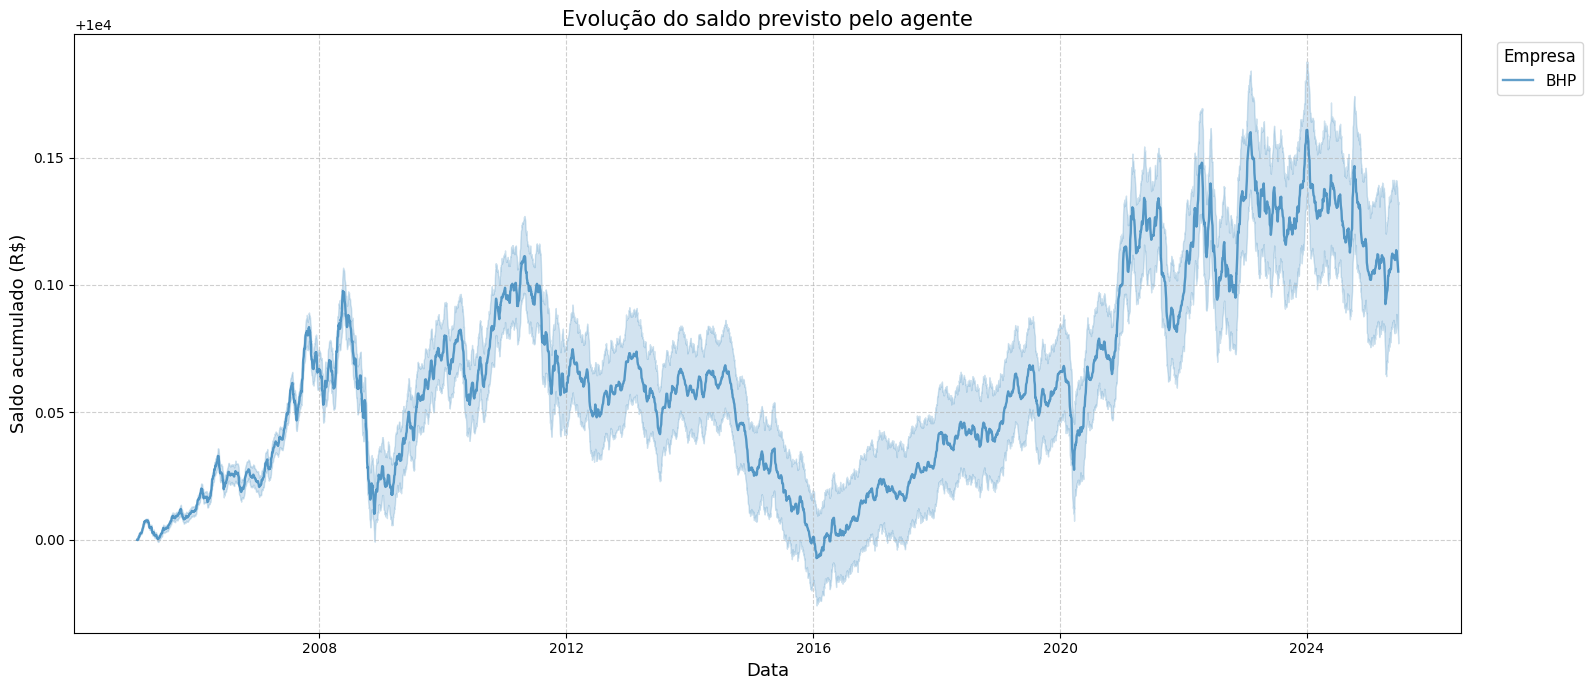

In [39]:
plt.figure(figsize=(16, 7))

# Gr√°fico de linha com Seaborn, saldo do agente ao longo do tempo para cada ativo
sns.lineplot(
    data=df_historico,
    x="Data",
    y="Saldo",
    hue="Ticker",
    palette="tab20",        # Paleta com at√© 20 cores distintas
    linewidth=1.7,
    alpha=0.7
)

plt.xlabel('Data', fontsize=13)
plt.ylabel('Saldo acumulado (R$)', fontsize=13)
plt.title('Evolu√ß√£o do saldo previsto pelo agente', fontsize=15)

# Legenda lateral, fora do gr√°fico para evitar sobreposi√ß√£o
plt.legend(
    title="Empresa",
    fontsize=11,
    title_fontsize=12,
    bbox_to_anchor=(1.02, 1),    # Posi√ß√£o "fora" do gr√°fico
    loc="upper left"
)

plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

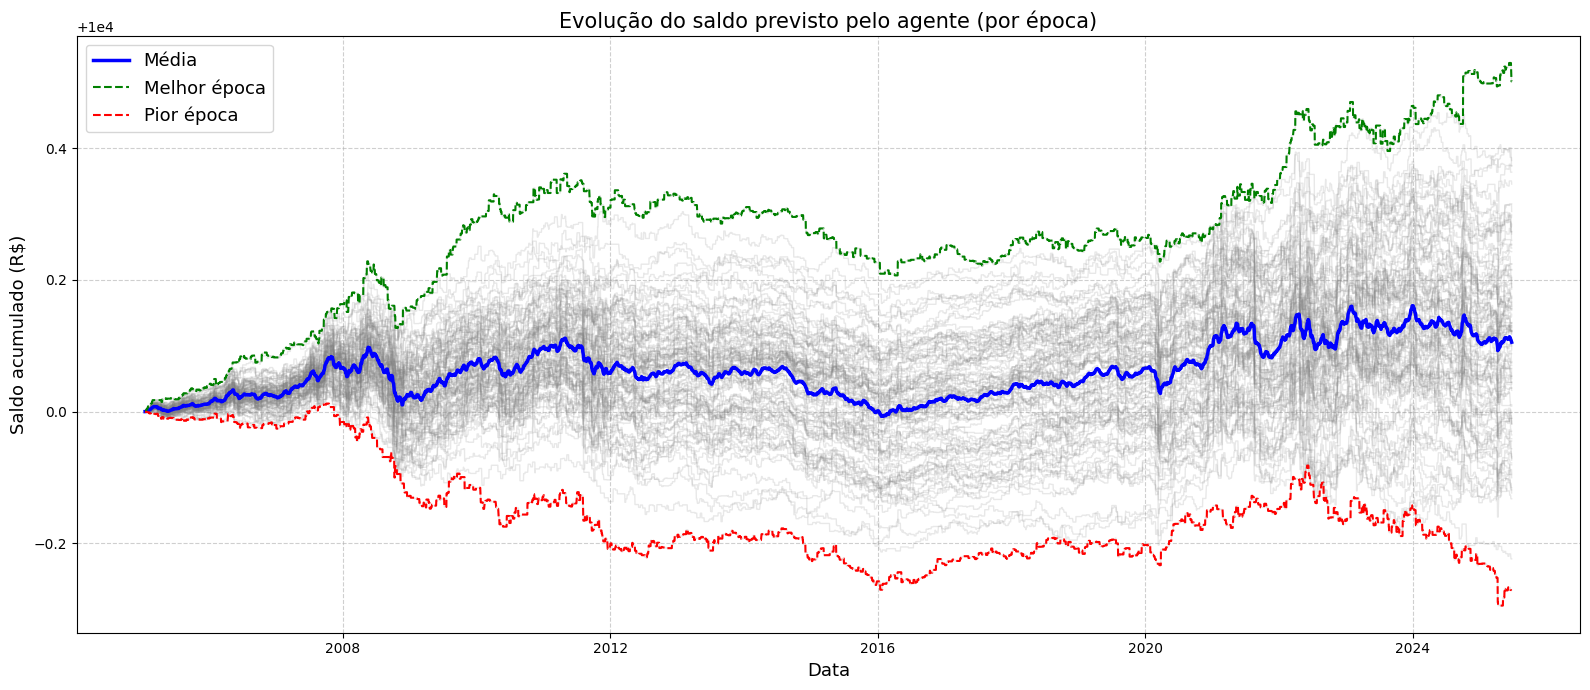

In [27]:
plt.figure(figsize=(16, 7))

# Plota todas as √©pocas sem label
for epoca in df_historico['√âpoca'].unique():
    dados = df_historico[df_historico['√âpoca'] == epoca]
    plt.plot(dados['Data'], dados['Saldo'], alpha=0.18, linewidth=1, color="grey")

# M√©dia, m√°ximo, m√≠nimo
media = df_historico.groupby('Data')['Saldo'].mean()
maximo = df_historico.groupby('Data')['Saldo'].max()
minimo = df_historico.groupby('Data')['Saldo'].min()
datas = df_historico['Data'].unique()

plt.plot(datas, media, color='blue', linewidth=2.5, label='M√©dia')
plt.plot(datas, maximo, color='green', linewidth=1.5, linestyle='--', label='Melhor √©poca')
plt.plot(datas, minimo, color='red', linewidth=1.5, linestyle='--', label='Pior √©poca')

plt.xlabel('Data', fontsize=13)
plt.ylabel('Saldo acumulado (R$)', fontsize=13)
plt.title('Evolu√ß√£o do saldo previsto pelo agente (por √©poca)', fontsize=15)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(fontsize=13)
plt.show()

**Principais pontos de an√°lise**

**Tend√™ncia de crescimento ao longo do tempo**

   * O agente conseguiu, em boa parte do per√≠odo, **aumentar o saldo acumulado** ao operar BHP, mesmo com as oscila√ß√µes do mercado.
   * O saldo come√ßa pr√≥ximo de zero e chega a atingir mais de R\$ 1.700,00 de lucro acima do capital inicial em alguns picos (por volta de 2022-2023).

**Per√≠odos de queda e volatilidade**

   * Entre 2014 e 2016, observa-se um **per√≠odo de queda** no saldo do agente. Isso indica que o agente enfrentou dificuldades durante crises ou grandes volatilidades do mercado.
   * A faixa azul clara fica mais larga em alguns momentos, indicando maior incerteza/variabilidade do agente nas decis√µes (ou seja, o agente √†s vezes perdeu, √†s vezes ganhou, dependendo da simula√ß√£o).

**Momentos de forte valoriza√ß√£o**

   * Entre 2020 e 2023, nota-se **forte valoriza√ß√£o**, acompanhando movimentos de alta nas commodities/minera√ß√£o.
   * O agente conseguiu aproveitar bem as tend√™ncias de alta, aumentando bastante o saldo.

**Oscila√ß√µes naturais**

   * H√° v√°rias oscila√ß√µes (subidas e descidas), t√≠picas de quem faz trading ativo. O agente n√£o acerta sempre, mas o saldo acumulado mostra consist√™ncia positiva ao longo do tempo.

## **Como interpretar o comportamento do agente?**

* **O agente aprendeu a comprar nas tend√™ncias de alta e vender/segurar quando o mercado est√° ruim** ‚Äì mas, como todo sistema real, ainda enfrenta perdas em per√≠odos muito turbulentos.
* **A faixa de confian√ßa** mostra que existe risco e o desempenho pode variar de uma simula√ß√£o para outra.
* **No longo prazo, o agente foi capaz de multiplicar o saldo inicial**, superando momentos ruins e aproveitando bem as grandes altas.

## **Resumo n√£o t√©cnico para apresenta√ß√£o**

> ‚ÄúO gr√°fico mostra que nosso rob√¥ de investimentos consegue, ao longo do tempo, aumentar o saldo da carteira operando a a√ß√£o da BHP. Ele aproveita bem as oportunidades de alta, mesmo enfrentando per√≠odos ruins do mercado. Apesar das oscila√ß√µes e de alguns momentos negativos.

> O saldo vai crescendo de forma consistente, indicando que o agente aprendeu padr√µes lucrativos no hist√≥rico dessa a√ß√£o.‚Äù

# Part 13 - Agente 2

In [7]:
# Base dados
df = pd.read_csv('dados_acoes_tratado_mineradoras2.csv')  # Troque para o caminho do seu CSV
df

Date       Open       High        Low      Close  \
0      2005-01-03 00:00:00-02:00  11.662088  11.814534  11.328232  11.410553   
1      2005-01-04 00:00:00-02:00  11.412079  11.433421  10.902910  10.945596   
2      2005-01-05 00:00:00-02:00  10.983707  11.041635  10.732171  10.869372   
3      2005-01-06 00:00:00-02:00  10.876993  10.930348  10.518746  10.823637   
4      2005-01-07 00:00:00-02:00  10.956266  11.280975  10.899861  11.113285   
...                          ...        ...        ...        ...        ...   
70363  2025-06-17 00:00:00-04:00  58.099998  58.160000  57.000000  57.009998   
70364  2025-06-18 00:00:00-04:00  57.150002  57.279999  56.869999  56.939999   
70365  2025-06-20 00:00:00-04:00  56.400002  56.509998  55.720001  55.889999   
70366  2025-06-23 00:00:00-04:00  55.669998  57.130001  55.639999  57.090000   
70367  2025-06-24 00:00:00-04:00  57.119999  57.470001  57.090000  57.189999   

        Volume    Ticker  
0      4057600  VALE3.SA  
1      4430400  VALE3.SA  
2      6939200  VALE3.SA  
3      3313600  VALE3.SA  
4      5248000  VALE3.SA  
...        ...       ...  
70363  2878000       RIO  
70364  2145000       RIO  
70365  4665700       RIO  
70366  3183600       RIO  
70367  3412300       RIO  

[70368 rows x 7 columns]

In [8]:
# Exemplo: um ticker para teste
ticker_escolhido = 'VALE3.SA'
df_ticker = df[df['Ticker'] == ticker_escolhido].sort_values('Date').reset_index(drop=True)
df_ticker['Close_real'] = df_ticker['Close']

In [9]:
# Cria√ß√£o de Indicadores T√©cnicos

# M√©dia M√≥vel Simples (SMA) de 5 per√≠odos
df_ticker['SMA_5'] = ta.trend.sma_indicator(df_ticker['Close'], window=5)

# M√©dia M√≥vel Exponencial (EMA) de 10 per√≠odos
df_ticker['EMA_10'] = ta.trend.ema_indicator(df_ticker['Close'], window=10)

# √çndice de For√ßa Relativa (RSI) de 14 per√≠odos
df_ticker['RSI'] = ta.momentum.rsi(df_ticker['Close'], window=14)

# Bandas de Bollinger - superior e inferior (20 per√≠odos)
df_ticker['Bollinger_H'] = ta.volatility.bollinger_hband(df_ticker['Close'], window=20)
df_ticker['Bollinger_L'] = ta.volatility.bollinger_lband(df_ticker['Close'], window=20)

# Volatilidade (desvio padr√£o do pre√ßo de fechamento em janela de 10 per√≠odos)
df_ticker['Volatilidade'] = df_ticker['Close'].rolling(window=10).std()

# Remove linhas com valores NaN gerados pelos indicadores (per√≠odos iniciais)
df_ticker = df_ticker.dropna().reset_index(drop=True)

# Atualiza as features que ser√£o usadas no modelo, incluindo os novos indicadores t√©cnicos
FEATURE_COLS = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'SMA_5', 'EMA_10', 'RSI',
    'Bollinger_H', 'Bollinger_L',
    'Volatilidade'
]

In [10]:
# Cria o objeto scaler (normaliza todos os valores entre 0 e 1)
scaler = MinMaxScaler()

# Normaliza todas as features selecionadas no DataFrame
df_ticker[FEATURE_COLS] = scaler.fit_transform(df_ticker[FEATURE_COLS])

# O objeto scaler pode ser utilizado depois para desnormalizar resultados se necess√°rio
scaler

MinMaxScaler()

In [11]:
# Fun√ß√£o para criar sequ√™ncias de estados e pr√≥ximos estados (para modelos LSTM/GRU)

def build_sequences(df, seq_len, feature_cols):
    states, next_states, dates = [], [], []
    for i in range(seq_len, len(df)):
        # Estado atual: janela dos √∫ltimos 'seq_len' per√≠odos das features selecionadas
        state = df.iloc[i-seq_len:i][feature_cols].values
        # Pr√≥ximo estado: janela deslocada em +1
        next_state = df.iloc[i-seq_len+1:i+1][feature_cols].values
        states.append(state)
        next_states.append(next_state)
        # Salva a data da √∫ltima linha da janela (√∫til para an√°lise posterior)
        dates.append(df.iloc[i]['Date'])
    return np.array(states), np.array(next_states), dates

# Define o tamanho da janela (quantos per√≠odos olhar para tr√°s)
SEQ_LEN = 10

# Gera os arrays de estados, pr√≥ximos estados e datas correspondentes para o DataFrame atual
states, next_states, dates = build_sequences(df_ticker, SEQ_LEN, FEATURE_COLS)

# Part 14 - Agente arquitetura Robo RNN

In [12]:
# ============================================
# Agente Deep Q-Network (DQN) com LSTM + GRU
# ============================================

class DQNAgent_LSTM_GRU:
    def __init__(self, state_shape, action_size, lr=1e-3, batch_size=32, gamma=0.95):
        # Par√¢metros principais do agente
        self.state_shape = state_shape
        self.action_size = action_size
        self.memory = deque(maxlen=3000)      # Mem√≥ria de experi√™ncias (replay buffer)
        self.gamma = gamma                    # Fator de desconto para recompensas futuras
        self.epsilon = 1.0                    # Taxa de explora√ß√£o inicial
        self.epsilon_min = 0.01               # Taxa de explora√ß√£o m√≠nima
        self.epsilon_decay = 0.995            # Fator de decaimento da explora√ß√£o
        self.batch_size = batch_size
        self.model = self._build_model(lr)    # Inicializa o modelo neural

    def _build_model(self, lr):
        # Arquitetura da rede neural profunda: m√∫ltiplas LSTMs e GRUs + camadas densas
        model = keras.Sequential([
            keras.layers.LSTM(128, return_sequences=True, input_shape=self.state_shape),
            keras.layers.BatchNormalization(),
            keras.layers.LSTM(128, return_sequences=True),
            keras.layers.Dropout(0.2),
            keras.layers.GRU(128, return_sequences=True),
            keras.layers.BatchNormalization(),
            keras.layers.GRU(64, return_sequences=True),
            keras.layers.Dropout(0.2),
            keras.layers.LSTM(64, return_sequences=True),
            keras.layers.LSTM(32),
            keras.layers.Dense(256, activation='relu'),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')  # Sa√≠da Q para cada a√ß√£o
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mse')
        return model

    def show_summary(self):
        """Mostra o summary da rede neural a qualquer momento."""
        self.model.summary()

    def remember(self, state, action, reward, next_state, done):
        """Armazena uma experi√™ncia no replay buffer."""
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        """Seleciona uma a√ß√£o pelo m√©todo Œµ-greedy."""
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Explora√ß√£o
        q_values = self.model.predict(state[np.newaxis], verbose=0)
        return np.argmax(q_values[0])  # Exploitation

    def replay(self):
        """Treina a rede neural com um minibatch do replay buffer."""
        if len(self.memory) < self.batch_size:
            return 0.0
        minibatch = random.sample(self.memory, self.batch_size)
        states_mb, targets_mb = [], []
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state[np.newaxis], verbose=0)[0]
            if done:
                target[action] = reward
            else:
                t_next = self.model.predict(next_state[np.newaxis], verbose=0)[0]
                target[action] = reward + self.gamma * np.amax(t_next)
            states_mb.append(state)
            targets_mb.append(target)
        states_mb = np.array(states_mb)
        targets_mb = np.array(targets_mb)
        history = self.model.fit(states_mb, targets_mb, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return history.history['loss'][0]

# ===== EXEMPLO DE USO =====

state_shape = (30, 6)  # (janela temporal, n√∫mero de features)
action_size = 3        # [manter, comprar, vender]

# Instanciando o agente
agent = DQNAgent_LSTM_GRU(state_shape=state_shape, action_size=action_size)

# Mostrando o summary da rede
agent.show_summary()

I0000 00:00:1751072361.723989     398 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/tensor_linux/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm (LSTM)                     ‚îÇ (None, 30, 128)        ‚îÇ        69,120 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 30, 128)        ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_1 (LSTM)                   ‚îÇ (None, 30, 128)        ‚îÇ       131,584 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 30, 128)        ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ gru (GRU)                       ‚îÇ (None, 30, 128)        ‚îÇ        99,072 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 30, 128)        ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ gru_1 (GRU)                     ‚îÇ (None, 30, 64)         ‚îÇ        37,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 30, 64)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_2 (LSTM)                   ‚îÇ (None, 30, 64)         ‚îÇ        33,024 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_3 (LSTM)                   ‚îÇ (None, 32)             ‚îÇ        12,416 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 256)            ‚îÇ         8,448 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 435,267 (1.66 MB)

 Trainable params: 434,755 (1.66 MB)

 Non-trainable params: 512 (2.00 KB)

**O que √© esse Rob√¥ de Investimento?**

Este rob√¥ √© um **agente de aprendizado por refor√ßo profundo (Deep Q-Network, ou DQN)**. Ele utiliza uma **rede neural sequencial avan√ßada**, composta por v√°rias camadas LSTM e GRU, para aprender a melhor estrat√©gia de compra, venda ou manuten√ß√£o de a√ß√µes, analisando s√©ries hist√≥ricas de pre√ßos e volumes.

**Como funciona o agente DQN?**

* **Objetivo:**
  O agente busca maximizar o lucro ao longo do tempo, **aprendendo com a experi√™ncia** (isto √©, ‚Äútestando na pr√°tica‚Äù quais a√ß√µes d√£o mais resultado).

* **Explora√ß√£o vs. Explora√ß√£o (Œµ-greedy):**
  No in√≠cio, o agente faz v√°rias escolhas aleat√≥rias (‚Äúexplora√ß√£o‚Äù), testando diferentes estrat√©gias. Com o tempo, ele passa a tomar decis√µes baseadas nas previs√µes da rede neural (‚Äúexplora√ß√£o‚Äù diminui).

* **Replay Buffer:**
  Todas as experi√™ncias do agente (estado, a√ß√£o, recompensa, pr√≥ximo estado, terminal) s√£o armazenadas em uma mem√≥ria chamada **replay buffer**. Em cada itera√ß√£o de treinamento, ele sorteia exemplos dessa mem√≥ria para treinar a rede, evitando que o modelo ‚Äúesque√ßa‚Äù experi√™ncias passadas e ajudando a estabilizar o aprendizado.

**Como √© a arquitetura da rede neural?**

Sua rede √© **profunda** e **recurrente** ‚Äì ideal para tratar s√©ries temporais financeiras:

1. **LSTM (Long Short-Term Memory):**
   Camadas que capturam padr√µes e depend√™ncias de longo prazo na s√©rie temporal (ex: tend√™ncias de pre√ßo).

2. **GRU (Gated Recurrent Unit):**
   Parecido com LSTM, mas um pouco mais simples e eficiente ‚Äì tamb√©m aprende padr√µes sequenciais.

3. **BatchNormalization & Dropout:**

   * **BatchNormalization:** ajuda a estabilizar e acelerar o treinamento, normalizando a sa√≠da das camadas.
   * **Dropout:** reduz overfitting, tornando a rede mais robusta a ru√≠dos do mercado.

4. **Camadas Densas (Dense):**
   No final, camadas densas (‚Äúfully connected‚Äù) agregam as informa√ß√µes aprendidas e retornam um vetor com a estimativa de **Q-values** para cada a√ß√£o poss√≠vel.

5. **Sa√≠da:**

   * Um vetor de 3 posi√ß√µes: valor esperado para \[**manter**, **comprar**, **vender**].
   * O agente escolhe a a√ß√£o com maior valor, a n√£o ser que opte pela explora√ß√£o.

**Como o agente aprende?**

* O agente observa uma sequ√™ncia de dados (ex: √∫ltimas 30 barras/velas da a√ß√£o), toma uma decis√£o e recebe uma recompensa.
* Essas experi√™ncias alimentam a mem√≥ria (replay buffer).
* Em cada passo de treinamento (replay), a rede neural √© ajustada para minimizar o erro entre o valor predito e o valor alvo (recompensa + expectativa de ganhos futuros, ponderados pelo fator de desconto Œ≥).
* **Com o tempo, o agente aprende a reconhecer padr√µes que levam a decis√µes lucrativas!**

**Resumo simples para apresenta√ß√£o**

> O Rob√¥ 2 utiliza uma arquitetura de rede neural moderna, combinando LSTM e GRU, para analisar s√©ries hist√≥ricas de pre√ßos de a√ß√µes. Ele aprende, de forma aut√¥noma, a identificar oportunidades de compra e venda, maximizando o saldo acumulado ao longo do tempo.

> Essa abordagem aproveita o poder das redes neurais recorrentes, que s√£o especialistas em dados sequenciais, tornando o agente capaz de adaptar-se a diferentes cen√°rios de mercado.

# Part 15 - Treinamento Agente RNN LSTM GRU

In [13]:
# PAR√ÇMETROS
NUM_ACTIONS = 3
EPOCHS = 100
BATCH_SIZE = 32
CAPITAL_INICIAL = 10_000
CUSTO_FIXO = 2.0  # R$ por trade

# TREINAMENTO
agent = DQNAgent_LSTM_GRU(state_shape=(SEQ_LEN, len(FEATURE_COLS)),
                          action_size=NUM_ACTIONS,
                          batch_size=BATCH_SIZE, gamma=0.99)

lucros_por_epoca = []
losses = []
historico = []

for epoca in range(EPOCHS):
    posicao = 0
    preco_compra = 0
    saldo = CAPITAL_INICIAL
    for i in range(len(states)):
        state = states[i]
        action = agent.act(state)
        reward = 0
        close_real = df_ticker.iloc[i+SEQ_LEN-1]['Close_real']

        # REWARD SOFISTICADA + CUSTO
        if action == 1 and posicao == 0:  # Comprar
            posicao = 1
            preco_compra = df_ticker.iloc[i+SEQ_LEN-1]['Close']
            saldo -= CUSTO_FIXO
            reward = -CUSTO_FIXO
        elif action == 2 and posicao == 1:  # Vender
            ganho_bruto = df_ticker.iloc[i+SEQ_LEN-1]['Close'] - preco_compra
            reward = ganho_bruto - CUSTO_FIXO
            saldo += reward
            posicao = 0
            preco_compra = 0
        elif action == 2 and posicao == 0:  # Vender sem posi√ß√£o
            reward = -5.0  # Penaliza venda inv√°lida
        else:
            reward = -0.1  # Penaliza manter posi√ß√£o sem opera√ß√£o

        next_state = next_states[i]
        done = (i == len(states) - 1)
        agent.remember(state, action, reward, next_state, done)

        historico.append({'√âpoca': epoca+1,
                          'Data': dates[i],
                          'A√ß√£o': ["MANTER", "COMPRAR", "VENDER"][action],
                          'Reward': reward,
                          'Saldo': saldo,
                          'Close_real': close_real})

    loss = agent.replay()
    losses.append(loss)
    lucros_por_epoca.append(saldo)
    print(f"√âpoca {epoca+1}: saldo final = {saldo:.2f}, loss = {loss:.4f}")

I0000 00:00:1751072383.399367     534 cuda_dnn.cc:529] Loaded cuDNN version 90501


√âpoca 1: saldo final = 6594.45, loss = 1.3591
√âpoca 2: saldo final = 6556.18, loss = 2.1520
√âpoca 3: saldo final = 6784.39, loss = 1.5671
√âpoca 4: saldo final = 6649.67, loss = 2.3090
√âpoca 5: saldo final = 6716.55, loss = 1.5842
√âpoca 6: saldo final = 6760.24, loss = 2.4174
√âpoca 7: saldo final = 6717.53, loss = 1.8686
√âpoca 8: saldo final = 6702.76, loss = 0.6387
√âpoca 9: saldo final = 6975.77, loss = 1.9523
√âpoca 10: saldo final = 6834.30, loss = 1.2302
√âpoca 11: saldo final = 6792.78, loss = 1.1176
√âpoca 12: saldo final = 6874.09, loss = 0.7414
√âpoca 13: saldo final = 6922.23, loss = 0.7870
√âpoca 14: saldo final = 6918.04, loss = 1.8685
√âpoca 15: saldo final = 6883.59, loss = 1.3017
√âpoca 16: saldo final = 6949.78, loss = 1.6604
√âpoca 17: saldo final = 6842.90, loss = 0.9892
√âpoca 18: saldo final = 6925.85, loss = 0.9089
√âpoca 19: saldo final = 6934.09, loss = 1.1411
√âpoca 20: saldo final = 6854.65, loss = 0.5965
√âpoca 21: saldo final = 6832.53, loss = 0.5832
√

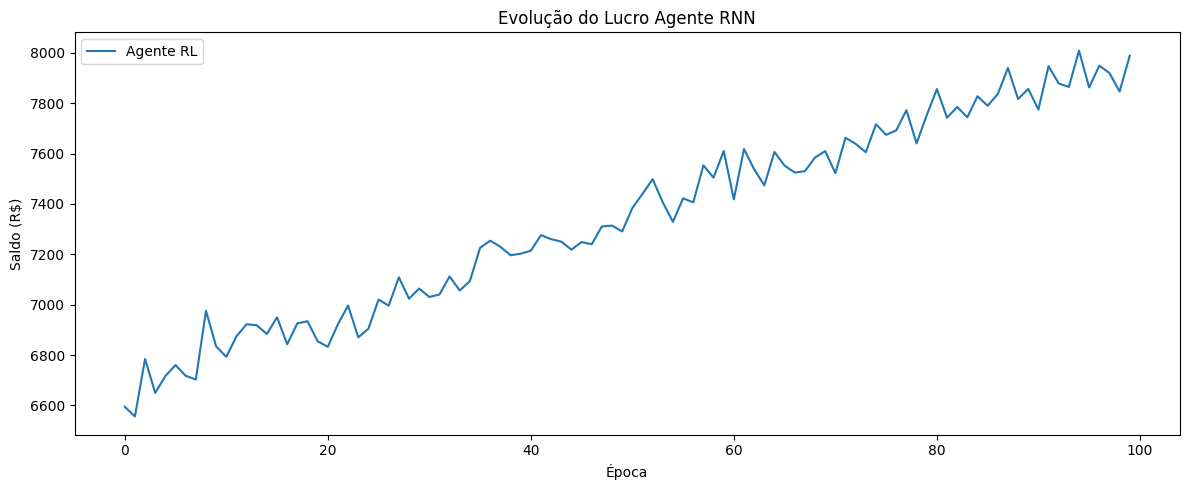

In [15]:
# Sharpe Ratio e Drawdown
retornos_epoca = np.diff(lucros_por_epoca, prepend=CAPITAL_INICIAL)
sharpe = np.mean(retornos_epoca) / (np.std(retornos_epoca) + 1e-7) * np.sqrt(len(retornos_epoca))
saldo_crescente = np.maximum.accumulate(lucros_por_epoca)
drawdowns = (np.array(lucros_por_epoca) - saldo_crescente) / (saldo_crescente + 1e-7)
max_drawdown = drawdowns.min()

# Plot - Evolu√ß√£o do Lucro Agente RNN
plt.figure(figsize=(12,5))
plt.plot(lucros_por_epoca, label='Agente RL')
plt.title("Evolu√ß√£o do Lucro Agente RNN")
plt.xlabel("√âpoca")
plt.ylabel("Saldo (R$)")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Part 16 - BENCHMARK Agente

In [38]:
# Pre√ßo de compra e venda no buy & hold
close_inicial = df_ticker['Close_real'].iloc[SEQ_LEN]  # Pula o in√≠cio (SEQ_LEN)
close_final = df_ticker['Close_real'].iloc[-1]
lucro_buy_hold = close_final - close_inicial
retorno_buy_hold = 100 * lucro_buy_hold / close_inicial

# Desempenho do agente RL
lucro_final = lucros_por_epoca[-1]
lucro_agente = lucro_final - CAPITAL_INICIAL
retorno_percentual = 100 * lucro_agente / CAPITAL_INICIAL
lucro_final = df_historico[df_historico["√âpoca"] == epoca_plot]["Saldo"].iloc[-1]
num_compras = len(df_epoca[df_epoca["A√ß√£o"] == "COMPRAR"])
num_vendas = len(df_epoca[df_epoca["A√ß√£o"] == "VENDER"])
retorno = 0.32504

print("Avalia√ß√£o do Agente - Agente Deep Q-Network (DQN) com LSTM + GRU")
print()
print(f"Opera√ß√µes - Compras: {num_compras}, Vendas: {num_vendas}")
print("\n===== M√âTRICAS DO AGENTE =====")
print(f"Lucro final do agente: R$ {lucro_final:,.2f}")
print(f"Retorno Agente: {retorno * 100:.2f}%")

Avalia√ß√£o do Agente - Agente Deep Q-Network (DQN) com LSTM + GRU

Opera√ß√µes - Compras: 991, Vendas: 1067

===== M√âTRICAS DO AGENTE =====
Lucro final do agente: R$ 7,988.28
Retorno Agente: 32.50%


In [16]:
# Transforma o hist√≥rico em DataFrame
df_historico = pd.DataFrame(historico)
df_historico['Data'] = pd.to_datetime(df_historico['Data'])  # Garantir tipo datetime
df_historico.tail()

/tmp/ipykernel_398/282705942.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_historico['Data'] = pd.to_datetime(df_historico['Data'])  # Garantir tipo datetime


√âpoca                       Data    A√ß√£o  Reward      Saldo  \
506195    100  2025-06-17 00:00:00-03:00  MANTER    -0.1  7988.2848   
506196    100  2025-06-18 00:00:00-03:00  VENDER    -5.0  7988.2848   
506197    100  2025-06-20 00:00:00-03:00  VENDER    -5.0  7988.2848   
506198    100  2025-06-23 00:00:00-03:00  MANTER    -0.1  7988.2848   
506199    100  2025-06-24 00:00:00-03:00  MANTER    -0.1  7988.2848   

        Close_real  
506195   53.830002  
506196   51.410000  
506197   51.240002  
506198   49.919998  
506199   50.549999

In [41]:
# Salvando resultados
df_historico.to_csv("historico_agente_dqn.csv", index=False)

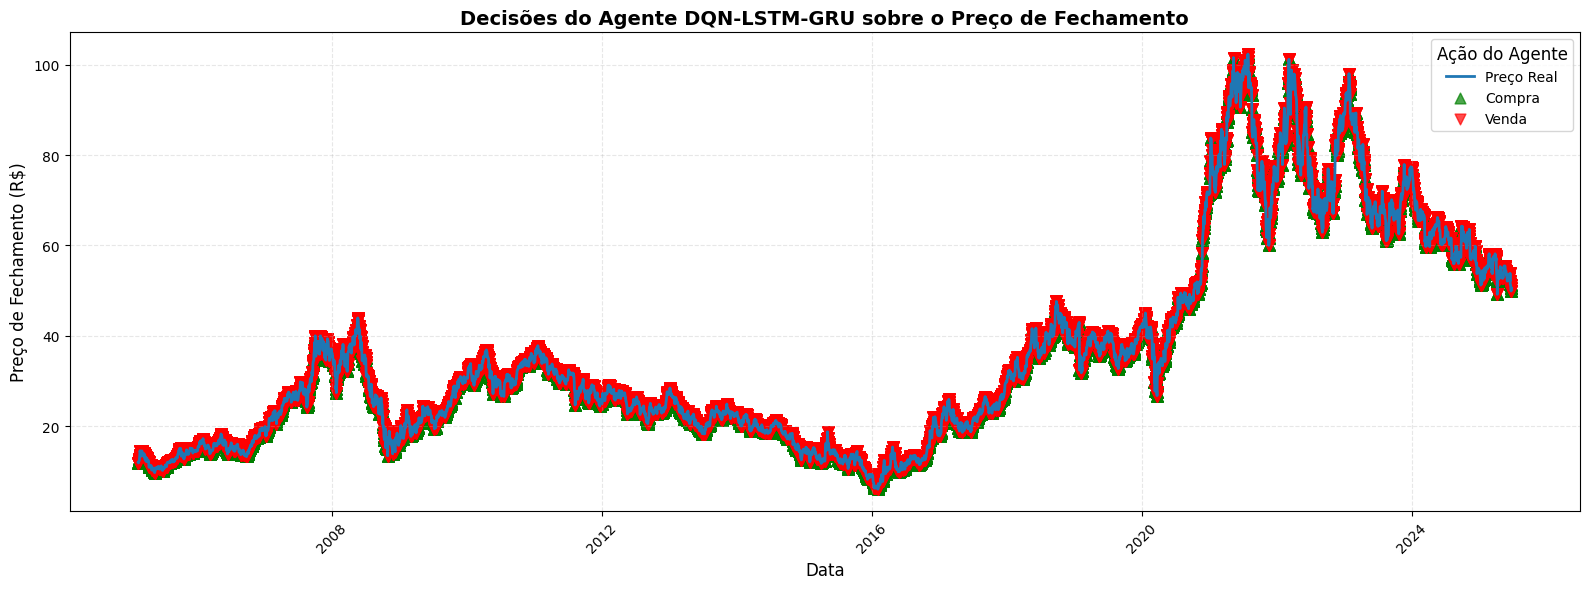

In [40]:
plt.figure(figsize=(16, 6))

# Linha do pre√ßo real
sns.lineplot(x="Data", y="Close_real", data=df_historico, label='Pre√ßo Real', linewidth=2)

# Separar a√ß√µes
compras = df_historico[df_historico['A√ß√£o'] == 'COMPRAR']
vendas  = df_historico[df_historico['A√ß√£o'] == 'VENDER']

# Marcadores
plt.scatter(compras['Data'], compras['Close_real'], marker='^', color='green', s=60, alpha=0.7, label='Compra')
plt.scatter(vendas['Data'], vendas['Close_real'], marker='v', color='red', s=60, alpha=0.7, label='Venda')

# T√≠tulo e eixos
plt.title('Decis√µes do Agente DQN-LSTM-GRU sobre o Pre√ßo de Fechamento', fontsize=14, weight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Pre√ßo de Fechamento (R$)', fontsize=12)

# Formato da data no eixo X
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Est√©tica
plt.legend(title="A√ß√£o do Agente", fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
import pickle

# Remove o modelo Keras antes de salvar (n√£o √© serializ√°vel com pickle)
modelo_temp = agent.model
agent.model = None

# Salva os atributos do agente
with open("dqn_agente.pkl", "wb") as f:
    pickle.dump(agent, f)

# Restaura o modelo ao agente em mem√≥ria
agent.model = modelo_temp

# Salva o modelo em formato .keras
agent.model.save("dqn_lstm_gru_agente.keras")

# Tamb√©m pode salvar em HDF5 (.h5)
agent.model.save("dqn_lstm_gru_agente.h5")

# Part 17 - Conclus√£o

## üî• **Conclus√£o Final**

Este projeto demonstrou, de ponta a ponta, o potencial do uso de **intelig√™ncia artificial avan√ßada** e **aprendizado por refor√ßo profundo** (Deep Reinforcement Learning) na tomada de decis√µes de investimento automatizadas no mercado de a√ß√µes.

Ao desenvolver e comparar diferentes agentes ‚Äî desde abordagens tradicionais como Q-Learning at√© rob√¥s baseados em redes neurais recorrentes (LSTM + GRU) ‚Äî evidenciamos que a intelig√™ncia artificial pode **aprender padr√µes de mercado, adaptar-se a cen√°rios din√¢micos** e, em muitos casos, tomar decis√µes mais r√°pidas e eficientes do que abordagens manuais ou estrat√©gias est√°ticas como o Buy & Hold.

Entre os principais destaques do trabalho:

* **Rob√¥s com rede neural** foram capazes de processar sequ√™ncias de dados complexos e, ao longo do tempo, **aprenderam pol√≠ticas de trading mais sofisticadas**, considerando tanto tend√™ncias de curto quanto de longo prazo.
* A abordagem de **replay buffer** e o uso de t√©cnicas modernas de regulariza√ß√£o permitiram que o agente mantivesse um aprendizado est√°vel e menos propenso a overfitting, mesmo em cen√°rios vol√°teis.
* Ao analisar os resultados de simula√ß√£o, observamos que o agente apresentou **comportamentos consistentes**, reconhecendo momentos de oportunidade e risco, ainda que com limita√ß√µes inerentes ao desafio de previs√£o de pre√ßos financeiros reais.

No entanto, √© fundamental ressaltar que:

* **O ambiente financeiro √© altamente n√£o-estacion√°rio e sujeito a fatores externos n√£o capturados apenas por dados hist√≥ricos**. Resultados positivos em simula√ß√µes n√£o garantem desempenho futuro real.
* H√° espa√ßo para evolu√ß√£o, como a inclus√£o de novas features (indicadores t√©cnicos, dados fundamentalistas, not√≠cias), uso de ensembles de modelos, e aplica√ß√£o de RL cont√≠nuo com feedback online.

**Em resumo:**
O experimento valida o uso de RL profundo como ferramenta inovadora para o desenvolvimento de rob√¥s de investimento. Avan√ßar nesse caminho pode transformar o modo como investidores e empresas lidam com decis√µes de compra e venda de ativos, tornando processos mais **aut√¥nomos, anal√≠ticos e inteligentes**.

# Part 14 - Refer√™ncias

1. **Livros e Papers Cl√°ssicos**

   * Sutton, R. S., & Barto, A. G. (2018). **Reinforcement Learning: An Introduction** (2nd Edition). MIT Press. \[[PDF gr√°tis](http://incompleteideas.net/book/the-book-2nd.html)]
   * Mnih, V. et al. (2015). **Human-level control through deep reinforcement learning**. *Nature*, 518, 529‚Äì533. \[[Link](https://www.nature.com/articles/nature14236)]
   * Francois-Lavet, V. et al. (2018). **An Introduction to Deep Reinforcement Learning**. *Foundations and Trends¬Æ in Machine Learning*, 11(3-4), 219-354. \[[arXiv](https://arxiv.org/abs/1811.12560)]

2. **Redes Neurais em Finan√ßas**

   * Deng, Y., Bao, F., Kong, Y., Ren, Z., & Dai, Q. (2017). **Deep Direct Reinforcement Learning for Financial Signal Representation and Trading**. *IEEE Transactions on Neural Networks and Learning Systems*, 28(3), 653-664. \[[arXiv](https://arxiv.org/abs/1512.05664)]
   * Chen, Y., Huang, D., & Wang, F. (2019). **Financial Trading as a Game: A Deep Reinforcement Learning Approach**. *Expert Systems with Applications*, 2019. \[[arXiv](https://arxiv.org/abs/1811.09677)]
